In [3]:
import numpy as np
import ast
import heapq
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
import warnings
from collections import deque
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
from matplotlib.colors import LinearSegmentedColormap


cali_trans = np.array([[0., 0., 0., 1, 0.],
       [466.98922175, 0., 0., 0., 0.],
       [0., 482.45576649, 0., 0., 0.],
       [0., 0., 531.94240303, 534.88991217, 537.8348471],
       [0., 0., 0., 0., 544.57966736],
       [539.39530067, 542.34668762, 545.296116, 0., 0.],
       [545.8128568, 0., 0., 0., 0.],
       [551.93973806, 0., 0., 0., 0.],
       [0., 0., 0., 593.61224713, 0.],
       [0., 0., 594.66382175, 597.61197776, 0.],
       [0., 0., 599.026636, 0., 0.],
       [0., 600.6848481, 603.6332481, 0., 0.],
       [602.56420404, 605.51640914, 0., 0., 0.],
       [607.65989686, 610.60973092, 0., 0., 0.],
       [613.18040057, 0., 0., 0., 0.],
       [0., 0., 0., 0., 596.88389115],
       [0., 0., 0., 0., 603.77622285],
       [0., 0., 0., 606.64997073, 609.59632907],
       [0., 0., 609.01680555, 0., 0.],
       [0., 0., 613.93423117, 616.88226792, 619.82677802],
       [0., 0., 618.46850091, 621.4167308, 0.],
       [0., 619.61628867, 622.56496579, 0., 0.],
       [0., 623.099117, 0., 0., 0.],
       [1, 0., 0., 0., 0.]])
all_trans = np.array([[  0.        , 457.75999873, 460.72196955, 463.68394036,
        466.62977127],
       [466.99294802, 469.97486848, 472.95678894, 475.93870939,
        478.92062985],
       [479.47904242, 482.46096288, 485.41016996, 488.35937703,
          0.        ],
       [  0.        ,   0.        , 531.94544764, 534.89326135,
        537.83854745],
       [  0.        , 535.74653352, 538.69236443, 541.63819534,
        544.58402625],
       [539.39912526, 542.35084521, 545.300608  , 548.26257881,
        551.22454963],
       [545.81732716, 548.79924762, 551.78116808, 554.76308853,
          0.        ],
       [551.94477172, 554.92669218, 557.90861264,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        , 593.61528986,
        596.56112077],
       [  0.        ,   0.        , 594.66692293, 597.61531136,
        600.56114227],
       [  0.        , 596.08091873, 599.0301258 , 601.99209662,
        604.95406743],
       [597.61531136, 600.68852942, 603.63732816, 606.65422318,
        609.60081274],
       [602.56807045, 605.52057971, 608.46978678, 611.41899386,
          0.        ],
       [607.66418416, 610.61441874, 613.56362581,   0.        ,
          0.        ],
       [613.18535061, 616.16727107,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        596.88713456],
       [  0.        ,   0.        ,   0.        , 600.83440408,
        603.78023499],
       [  0.        ,   0.        , 603.69225236, 606.65422318,
        609.60081274],
       [  0.        , 606.07214876, 609.02135584, 611.98332665,
        614.94529747],
       [608.04091204, 610.99011912, 613.93932619, 616.8876211 ,
        619.83247952],
       [612.5755976 , 615.52480467, 618.47401175, 621.42247375,
          0.        ],
       [616.63994273, 619.62186318, 622.57092288,   0.        ,
          0.        ],
       [620.12318854, 623.105109  ,   0.        ,   0.        ,
          0.        ],
       [620.45960741,   0.        ,   0.        ,   0.        ,
          0.        ]])

all_trans_test = np.array([[  0.        , 457.75999873, 460.72196955, 463.68394036,
        466.62977127],
       [466.99294802, 469.97486848, 472.95678894, 475.93870939,
        478.92062985],
       [479.47904242, 482.46096288, 485.41016996, 488.35937703,
          0.        ],
       [  0.        ,   0.        , 531.94544764, 534.89326135,
        537.83854745],
       [  0.        , 535.74653352, 538.69236443, 541.63819534,
        544.58402625],
       [539.39912526, 542.35084521, 545.300608  , 548.26257881,
        551.22454963],
       [545.81732716, 548.79924762, 551.78116808, 554.76308853,
          0.        ],
       [551.94477172, 554.92669218, 557.90861264,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        , 593.61528986,
        596.56112077],
       [  0.        ,   0.        , 594.66692293, 597.61531136,
        600.56114227],
       [  0.        , 596.08091873, 599.0301258 , 601.99209662,
        604.95406743],
       [597.61531136, 600.68852942, 603.63732816, 606.65422318,
        609.60081274],
       [602.56807045, 605.52057971, 608.46978678, 611.41899386,
          0.        ],
       [607.66418416, 610.61441874, 613.56362581,   0.        ,
          0.        ],
       [613.18535061, 616.16727107,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        596.88713456],
       [  0.        ,   0.        ,   0.        , 600.83440408,
        603.78023499],
       [  0.        ,   0.        , 603.69225236, 606.65422318,
        609.60081274],
       [  0.        , 606.07214876, 609.02135584, 611.98332665,
        614.94529747],
       [608.04091204, 610.99011912, 613.93932619, 616.8876211 ,
        619.83247952],
       [612.5755976 , 615.52480467, 618.47401175, 621.42247375,
          0.        ],
       [616.63994273, 619.62186318, 622.57092288,   0.        ,
          0.        ],
       [620.12318854, 623.105109  ,   0.        ,   0.        ,
          0.        ],
       [620.45960741,   0.        ,   0.        ,   0.        ,
          0.        ]])

all_trans_without_mf0 = np.array([[  0.        , 0, 0, 463.68394036,466.62977127],
       [466.99294802, 469.97486848, 0, 475.93870939,478.92062985],
       [479.47904242, 482.46096288, 0, 488.35937703,0.        ],
       [  0.        ,   0.        , 0, 534.89326135,537.83854745],
       [  0.        , 535.74653352, 0, 541.63819534,544.58402625],
       [539.39912526, 542.35084521, 545.300608  , 548.26257881,551.22454963],
       [545.81732716, 548.79924762, 0, 554.76308853,0.        ],
       [551.94477172, 554.92669218, 0,   0.        ,0.        ],
       [  0.        ,   0.        ,   0.        , 593.61528986,596.56112077],
       [  0.        ,   0.        , 0, 597.61531136,600.56114227],
       [  0.        , 596.08091873, 0 , 601.99209662,604.95406743],
       [597.61531136, 600.68852942, 0, 606.65422318,609.60081274],
       [602.56807045, 605.52057971, 0, 611.41899386, 0.        ],
       [607.66418416, 610.61441874, 0,   0.        ,0.        ],
       [613.18535061, 616.16727107,   0.        ,   0.        ,0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,596.88713456],
       [  0.        ,   0.        ,   0.        , 600.83440408,603.78023499],
       [  0.        ,   0.        , 0, 606.65422318,609.60081274],
       [  0.        , 606.07214876, 0, 611.98332665,614.94529747],
       [608.04091204, 610.99011912, 0, 616.8876211 ,619.83247952],
       [612.5755976 , 615.52480467, 0, 621.42247375,0.        ],
       [616.63994273, 619.62186318, 0,   0.        , 0.        ],
       [620.12318854, 623.105109  ,   0.        ,   0.        ,0.        ],
       [620.45960741,   0.        ,   0.        ,   0.        ,0.        ]])

transition_strengths = np.array([[np.nan, 0.0563, 0.055, 0.0519, 0.0341],
                        [0.0753, 0.0246, 0.0096, 0.0336, 0.056],
                        [0.053, 0.0598, 0.047, 0.0355, np.nan],
                        [np.nan, np.nan, 0.1103, 0.1061, 0.0819],
                        [np.nan, 0.1273, 0.0275, 0.0613, 0.0981],
                        [0.0973, 0.0635, 0.0919, 0.0258, 0.0932],
                        [0.1163, 0.0281, 0.0575, 0.107, np.nan],
                        [0.1105, 0.1056, 0.0814, np.nan, np.nan],
                        [np.nan, np.nan, np.nan, 0.2813, 0.0091],
                        [np.nan, np.nan, 0.2288, 0.1549, 0.0415],
                        [np.nan, 0.1517, 0.2135, 0.0697, 0.0446],
                        [0.0763, 0.2008, 0.1741, 0.003, 0.0359],
                        [0.1367, 0.2351, 0.0773, 0.039, np.nan],
                        [0.2241, 0.1763, 0.0106, np.nan, np.nan],
                        [0.268, 0.0634, np.nan, np.nan, np.nan],
                        [np.nan, np.nan, np.nan, np.nan, 0.3278],
                        [np.nan, np.nan, np.nan, 0.0828, 0.268],
                        [np.nan, np.nan, 0.0019, 0.1664, 0.234],
                        [np.nan, 0.025, 0.0679, 0.2278, 0.1523],
                        [0.0232, 0.001, 0.156, 0.2077, 0.0915],
                        [0.0309, 0.0593, 0.206, 0.1694, np.nan],
                        [0.0276, 0.1438, 0.2401, np.nan, np.nan],
                        [0.0094, 0.2862, np.nan, np.nan, np.nan],
                        [0.3278, np.nan, np.nan, np.nan, np.nan]])

pi_t = [20.9982, 39.0571, 45.5531, 33.9067, 45.1339]

pitime_n2 = pi_t[0] # [-2, 4, -4]
pitime_n1 = pi_t[1] # [-2, 3, -3]
pitime_0 = pi_t[2] # [2, 4, 2]
pitime_p1 = pi_t[3] # [2, 4, 3]
pitime_p2 = pi_t[4] # [2, 4, 4]

factors = np.array([pitime_n2*0.3278,pitime_n1*0.268,pitime_0*0.234,pitime_p1*0.268,pitime_p2*0.3278])

Fs = [1,2,3,4]
row_labels = []
for i in Fs:
    for j in range(2*i+1):
        mF = i-j
        row_labels.append([i,mF])
col_labels = [-2, -1, 0, 1, 2]

pi_times = np.zeros((24,5))
for i in range(np.shape(transition_strengths)[0]):
    for j in range(np.shape(transition_strengths)[1]):
        # print(i,j)
        if not np.isnan(transition_strengths[i,j]):
            # print(row_labels[i][1],col_labels[j])
            delta_m = (row_labels[i][1]-col_labels[j])+2
            # print(delta_m)
            pi_times[i,j] = factors[delta_m]/transition_strengths[i,j]
# print(np.round(pi_times,3))
def get_pi_times(transitions,matrix = pi_times):
    pi_times_list = []
    for transition in transitions:
        row_label = [transition[1],transition[2]]
        Fs = [1,2,3,4]
        states = []
        for i in Fs:
            for j in range(2*i+1):
                mF = i-j
                states.append([i,mF])
    
        row_labels = states
    
        col_label = transition[0]
    
        # Find the index of the row label
        row_index = next((i for i, label in enumerate(row_labels) if label == row_label), None)
        # Find the index of the column label
        col_index = col_labels.index(col_label)
        
        if row_index is not None and col_index in range(len(col_labels)):
            pi_times_list.append(matrix[row_index, col_index])
        else:
            pi_times_list.append(np.nan)

    return pi_times_list


# an1_pitimes = np.genfromtxt('PiTime_scale_param.txt', delimiter=',', dtype=float)
# # print(an1_pitimes)
# pitime_n2 = pi_t[0] # [-2, 4, -4]
# pitime_n1 = pi_t[1] # [-2, 3, -3]
# pitime_0 = pi_t[2] # [2, 4, 2]
# pitime_p1 = pi_t[3] # [2, 4, 3]
# pitime_p2 = pi_t[4] # [2, 4, 4]

# factors_an1 = np.array([pitime_n2,pitime_n1,pitime_0,pitime_p1,pitime_p2])

# Fs = [1,2,3,4]
# row_labels = []
# for i in Fs:
#     for j in range(2*i+1):
#         mF = i-j
#         row_labels.append([i,mF])
# col_labels = [-2, -1, 0, 1, 2]

# pi_times_an1 = np.zeros((24,5))
# for i in range(np.shape(an1_pitimes)[0]):
#     for j in range(np.shape(an1_pitimes)[1]):
#         # print(i,j)
#         if not np.isnan(an1_pitimes[i,j]):
#             # print(row_labels[i][1],col_labels[j])
#             delta_m = (row_labels[i][1]-col_labels[j])+2
#             # print(delta_m)
#             pi_times_an1[i,j] = factors_an1[delta_m]*an1_pitimes[i,j]
# print(np.round(pi_times_an1,3))
# print(np.round(pi_times - pi_times_an1,3))

In [4]:
# import numpy as np
# from scipy.io import loadmat

# mat_data = loadmat('sensitivity_matrix_4p216G.mat')

# matrix_sen_24x5 = mat_data['S']


# K2T2 = (matrix_sen_24x5**2) * (pi_times**2)

# print(np.round(K2T2))
# K2T2_with_nans = np.where(K2T2 == 0, np.nan, K2T2)
# get_pi_times([[0,1,1],[0,2,2],[0,3,2]],K2T2)

In [7]:
# fidelity_matrix = np.loadtxt('fidelity_matrix.txt')
# print(fidelity_matrix)

In [9]:
import heapq
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
import warnings
from collections import deque

# Suppress specific numpy deprecation warning
warnings.filterwarnings("ignore", category=DeprecationWarning, message="`alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.")


def plot_coupling_graph_from_matrix(matrix,transition_strengths = transition_strengths, pos=None, show_graph = True):

    rows, cols = matrix.shape

    # Create a bipartite graph
    G = nx.Graph()
    Fs = [1, 2, 3, 4]
    row_labels = []
    for i in Fs:
        for j in range(2 * i + 1):
            mF = i - j
            row_labels.append([i, mF])
    col_labels = [-2, -1, 0, 1, 2]

    # Add edges based on non-zero elements in the matrix and assign weights
    for i in range(rows):
        for j in range(cols):
            if matrix[i, j] != 0 and matrix[i,j]!=np.nan:
                # print(transition_strengths[i, j])
                G.add_edge(f"{row_labels[i]}", f"{col_labels[j]}", weight=transition_strengths[i, j])

    # Generate positions for the nodes
    if pos is None:
        pos = {
            '-2': (-2, -2),
            '-1': (-1, -2),
            '0': (0, -2),
            '1': (1, -2),
            '2': (2, -2),
        }
    for i in row_labels:
        pos[f"{i}"] = (i[1], abs(i[0] - 4))
    for i in row_labels:
        G.add_node(f"{i}", pos=pos[f'{i}'])
    for j in col_labels:
        G.add_node(f"{j}", pos=pos[f'{i}'])
    if show_graph:
        colors = list(mcolors.TABLEAU_COLORS.values())
    
        plt.figure(figsize=(10, 7))
    
        for j in range(cols):
            edges = [(f"{row_labels[i]}", f"{col_labels[j]}") for i in range(rows) if matrix[i, j] != 0]
            weights = [matrix[i, j] for i in range(rows) if matrix[i, j] != 0]
            nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=colors[j % len(colors)], width=2, alpha=0.6)
    
        # Draw nodes with rectangular patches
        xh = 0.5
        yh = 0.25
        ax = plt.gca()
        for node, (x, y) in pos.items():
            ax.add_patch(Rectangle((x - xh / 2, y - yh / 2), xh, yh, fill=True, color='black', ec='black', lw=1))
    
        nx.draw_networkx_labels(G, pos, font_size=10, font_color='white')
    
        # Draw edge labels (weights)
        # edge_labels = nx.get_edge_attributes(G, 'weight')
        # nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    
        plt.xlim(-4.5, 4.5)
        plt.ylim(-2.5, 3.5)
    
        # Show the plot
        plt.title('Coupling Graph from Matrix')
        plt.show()

    return G


from collections import deque

# def find_shortest_paths_with_min_weight(start_node, end_node,matrix = all_trans,weight_matrix = transition_strengths,  min_weight=0):
#     G = plot_coupling_graph_from_matrix(matrix, weight_matrix, show_graph=False)
#     G_strength = plot_coupling_graph_from_matrix(matrix, transition_strengths, show_graph=False)
#     queue = deque([[start_node]])
#     shortest_paths = []
#     shortest_length = float('inf')

#     while queue:
#         path = queue.popleft()
#         node = path[-1]

#         if node == end_node:
#             path_length = len(path)
#             list_of_weights = [G[path[i]][path[i + 1]]['weight'] for i in range(len(path) - 1)]
#             total_weight_sum = np.sum([G[path[i]][path[i + 1]]['weight'] for i in range(len(path) - 1)])
#             # print([G[path[i]][path[i + 1]]['weight'] for i in range(len(path) - 1)],np.prod([G[path[i]][path[i + 1]]['weight'] for i in range(len(path) - 1)]))
#             # if path_length < shortest_length:
#             #     shortest_paths = [(path, path_length, total_weight_product)]
#             #     shortest_length = path_length
#             # elif path_length == shortest_length:
#             shortest_paths.append((path, path_length, total_weight_sum,list_of_weights))

#         else:
#             for neighbor in G.neighbors(node):
#                 # print(neighbor)
#                 # print(path)
#                 if neighbor not in path:  # Avoid cycles
#                     edge_weight = G_strength[node][neighbor]['weight']
#                     if edge_weight >= min_weight:
#                         new_path = list(path)
#                         new_path.append(neighbor)
#                         queue.append(new_path)
#         if len(shortest_paths) > 5000:
#             break
#     return shortest_paths


# G = plot_coupling_graph_from_matrix(all_trans,show_graph=False)
# start_node = '0'
# end_node = '[4, 2]'
# shortest_paths_with_weights = find_shortest_paths_with_min_weight(start_node, end_node,matrix = transition_strengths, weight_matrix = pi_times)
# # print(shortest_paths_with_weights)
# # Print the shortest paths with their lengths and total weights
# print(len(shortest_paths_with_weights))

# fastest_path = min(shortest_paths_with_weights, key=lambda x: x[2])
# print(fastest_path)

In [11]:
from collections import deque
import numpy as np

def find_least_weight_paths(start_node, end_node, matrix, weight_matrix, min_weight=0):
    G = plot_coupling_graph_from_matrix(matrix, weight_matrix, show_graph=False)
    queue = deque([[start_node]])
    least_weight_paths = []
    best_weight = None  # Delay initializing the best weight until we find a valid path

    while queue:
        path = queue.popleft()
        node = path[-1]

        # Compute the current path's total weight
        current_weights = [G[path[i]][path[i + 1]]['weight'] for i in range(len(path) - 1)]
        current_total_weight = np.sum(current_weights)

        # If best_weight is already set, prune paths exceeding it
        if best_weight is not None and current_total_weight > best_weight:
            continue

        if node == end_node:
            if best_weight is None or current_total_weight < best_weight:
                # Set or update the best weight when a valid path is found
                best_weight = current_total_weight
                least_weight_paths = [(path, current_total_weight, current_weights)]
            elif current_total_weight == best_weight:
                # Add paths with the same minimum weight
                least_weight_paths.append((path, current_total_weight, current_weights))
        else:
            for neighbor in G.neighbors(node):
                if neighbor not in path:  # Avoid cycles
                    edge_weight = G[node][neighbor]['weight']
                    if edge_weight >= min_weight:
                        # Compute estimated total weight
                        estimated_total_weight = current_total_weight + edge_weight

                        if best_weight is None or estimated_total_weight <= best_weight:
                            new_path = list(path)
                            new_path.append(neighbor)
                            queue.append(new_path)

    return least_weight_paths


In [13]:
# start_node = '[1, 1]'
# end_node = '[4, -4]'
# shortest_paths_with_weights = find_least_weight_paths(start_node, end_node,matrix = pi_times, weight_matrix = pi_times)
# print(shortest_paths_with_weights)

In [15]:
import time

Fs = [1, 2, 3, 4]
row_labels = []
for i in Fs:
    for j in range(2 * i + 1):
        mF = i - j
        row_labels.append([i, mF])

col_labels = [-2,-1,0,1,2]

all_labels = row_labels + col_labels

list_all_fastest_paths = []
start_time = time.time()
for i in all_labels:
    for j in all_labels:
        start_node = str(i)
        end_node = str(j)
        shortest_paths_with_weights = find_least_weight_paths(start_node, end_node,matrix = all_trans,weight_matrix = pi_times)
        fastest_path = min(shortest_paths_with_weights, key=lambda x: x[2])
        current_time = time.time()
        # print(current_time-start_time,' ',start_node, end_node, fastest_path)
        list_all_fastest_paths.append(fastest_path)


# Save list_all_fastest_paths to a text file
with open('fastest_paths.txt', 'w') as f:
    for path in list_all_fastest_paths:
        f.write(f"{path}\n")

In [17]:

# Read list_all_fastest_paths from the text file
list_all_fastest_paths = []
with open('fastest_paths.txt', 'r') as f:
    for line in f:
        # Convert string representation of list back to actual list
        path = eval(line.strip())
        list_all_fastest_paths.append(path)


In [19]:
list_of_paths_og = []
for i in list_all_fastest_paths:
    list_of_paths_og.append(i[0])

# print(list_of_paths_og)

In [21]:
from collections import defaultdict

def count_bus_node_usage(paths):
    bus_node_count = defaultdict(int)  # Dictionary to store counts of bus nodes
    for path in paths:
        # Identify bus nodes (exclude first and last nodes)
        if len(path) > 2:  # Ensure there are bus nodes
            bus_nodes = path[1:-1]
            for bus_node in bus_nodes:
                bus_node_count[bus_node] += 1
                
                
    return dict(bus_node_count)


bus_node_usage = count_bus_node_usage(list_of_paths_og)

for i, j in bus_node_usage.items():
    print(i, '----', j)

# bus_node = '[2, -2]'
# for i in list_of_paths_og:
#     if bus_node in i[1:-1]:
#         print(i)

1 ---- 228
[4, 2] ---- 56
2 ---- 158
0 ---- 184
-1 ---- 144
[2, -2] ---- 8
-2 ---- 142
[4, 0] ---- 30
[3, -2] ---- 32
[2, -1] ---- 58
[4, -2] ---- 48
[4, -1] ---- 50
[2, 0] ---- 42


In [23]:
import scipy # type: ignore

fidelity_matrix = np.loadtxt('fidelity_matrix.txt')
# print(fidelity_matrix)

mat = scipy.io.loadmat('Full_sensitivity_matrix_with_lables.mat')
Sen_matrix = mat['Sen_matrix']
# print(Sen_matrix[:24,:-5])
# plt.figure()
# plt.imshow(Sen_matrix[:24,-5:])
G_sen_sq = plot_coupling_graph_from_matrix(fidelity_matrix, Sen_matrix[:24,-5:], show_graph=False)

Sen_sq_list = []

for path in list_of_paths_og:
    list_of_weights = [G_sen_sq[path[i]][path[i + 1]]['weight'] for i in range(len(path) - 1)]
    len_list = len(list_of_weights)
    # print(len_list)
    if len_list == 0 or len_list == 1:
        Sen_sq_list.append([path,np.sum(np.array(([0.0001]))**2)])
    else:
        Sen_sq_list.append([path,np.sum(np.array((list_of_weights))**2)/len_list])
# print(Sen_sq_list)
G_strength = plot_coupling_graph_from_matrix(fidelity_matrix, fidelity_matrix, show_graph=False)

infidelity_list = []

for path in list_of_paths_og:
   infidelity_list.append([path,np.sum(1-np.array(([G_strength[path[i]][path[i + 1]]['weight'] for i in range(len(path) - 1)])))])

# print(infidelity_list)

In [25]:
import pandas as pd

# Your data
def create_29x29_matrix(data):
    # Function to check if a string is a node
    def is_node(s):
        # return s.startswith('[') and s.endswith(']')
        return True

    # Collect all unique nodes
    nodes = set()
    for path_taken,_ in data:
        for element in path_taken:
            if is_node(element):
                nodes.add(element)

    nodes = sorted(nodes)

    # Initialize the matrix as a DataFrame
    infidelity_df = pd.DataFrame(index=nodes, columns=nodes)

    # Fill the matrix
    for path_taken,total_time in data:
        # Extract start and end nodes
        start_node = next((node for node in path_taken if is_node(node)), None)
        end_node = next((node for node in reversed(path_taken) if is_node(node)), None)
        
        # Extract single-digit nodes
        single_digit_nodes = tuple(int(element) for element in path_taken if element.lstrip('-').isdigit())
        # print(single_digit_nodes)
        if start_node and end_node:
            # Save the tuple of single-digit nodes in the matrix
            infidelity_df.loc[start_node, end_node] = total_time

    Fs = [1, 2, 3, 4]
    row_labels = []
    for i in Fs:
        for j in range(2 * i + 1):
            mF = i - j
            row_labels.append([i, mF])

    col_labels = [-2,-1,0,1,2]

    all_labels = row_labels + col_labels

    matrix_29x29 = np.zeros((29, 29))
    for i,r in enumerate(all_labels):
        for j,c in enumerate(all_labels):
            # print(infidelity_df.loc[str(r),str(c)])
            matrix_29x29[i,j] = infidelity_df.loc[str(r),str(c)]
            
    return matrix_29x29
        # print(infidelity_matrix_29x29[i,j])
infidelity_matrix_29x29 = create_29x29_matrix(infidelity_list)
sen_sq_matrix_29x29 = create_29x29_matrix(Sen_sq_list)
# print(infidelity_matrix_29x29)
# plt.figure()
# plt.imshow(infidelity_matrix_29x29)
L_G = (1/2054.4241218909024)**2
L_L = 1/1916.8500604713997



# matrix = infidelity_matrix_29x29
# np.fill_diagonal(matrix, np.nan)
# plt.figure(figsize=(18, 14))  # Adjust figure size for better fit
# ax = sns.heatmap(matrix, annot=False, fmt='.5f', cmap='viridis',
#                  xticklabels=x_labels, yticklabels=y_labels, cbar=False, 
#                  linewidths=0.5, linecolor='black')

# # Rotate x-axis labels for better readability
# plt.xticks(rotation=45, ha='right')

# # Add labels and title
# plt.xlabel('States')
# plt.ylabel('States')
# plt.title('All Effective $T_2^*$ Times [ms]')

# for i in range(matrix.shape[0]):
#     for j in range(matrix.shape[1]):
#         value = matrix[i, j] / matrix.max()  # Normalize the value to [0, 1] range
#         ax.text(j + 0.5, i + 0.5, f'{np.round(matrix[i, j],4)}', 
#                 ha='center', va='center', color='white' if matrix[i, j] > 0.001  or np.isnan(matrix[i, j]) else 'black', fontsize=8)

# ax.add_patch(Rectangle((0, 0), matrix.shape[1], matrix.shape[0], 
#                        fill=False, edgecolor='black', linewidth=2))

# # Adjust layout to fit everything neatly
# plt.tight_layout()

# # plt.savefig('All_effective_T2_times.pdf', dpi = 800)
# plt.show()

In [27]:
import pandas as pd

# Your data
data = list_all_fastest_paths
# print(data)
# Function to check if a string is a node
def is_node(s):
    # return s.startswith('[') and s.endswith(']')
    return True

# Collect all unique nodes
nodes = set()
for path_taken, _, _ in data:
    for element in path_taken:
        if is_node(element):
            nodes.add(element)

nodes = sorted(nodes)

# Initialize the matrix as a DataFrame
matrix_df_S12 = pd.DataFrame(index=nodes, columns=nodes)

# Fill the matrix

for path_taken, _, total_time, in data:
    # Extract start and end nodes
    start_node = next((node for node in path_taken if is_node(node)), None)
    end_node = next((node for node in reversed(path_taken) if is_node(node)), None)
    
    # Extract single-digit nodes
    single_digit_nodes = tuple(int(element) for element in path_taken if element.lstrip('-').isdigit())
    
    if start_node and end_node:
        # Save the tuple of single-digit nodes in the matrix
        matrix_df_S12.loc[start_node, end_node] = single_digit_nodes

# Display the matrix
# print(matrix_df_S12)


In [29]:
import pandas as pd

# Your data
data = list_all_fastest_paths
# Function to check if a string is a node
def is_node(s):
    # return s.startswith('[') and s.endswith(']')
    return True

# Collect all unique nodes
nodes = set()
for path_taken, _, _ in data:
    for element in path_taken:
        if is_node(element):
            nodes.add(element)

nodes = sorted(nodes)

# Initialize the matrix as a DataFrame
matrix_df = pd.DataFrame(index=nodes, columns=nodes)

# Fill the matrix
for path_taken,  total_time,_ in data:
    # Extract start and end nodes
    start_node = next((node for node in path_taken if is_node(node)), None)
    end_node = next((node for node in reversed(path_taken) if is_node(node)), None)
    
    if start_node and end_node:
        matrix_df.loc[start_node, end_node] = total_time

# Display the matrix
# print(matrix_df)


In [31]:
Fs = [1, 2, 3, 4]
row_labels = []
for i in Fs:
    for j in range(2 * i + 1):
        mF = i - j
        row_labels.append([i, mF])

col_labels = [-2,-1,0,1,2]

all_labels = row_labels + col_labels
pi_times_array = np.zeros([29,29])
for i,r in enumerate(all_labels):
    for j,c in enumerate(all_labels):
        pi_times_array[i,j] = matrix_df.loc[str(r),str(c)]

S12_nodes_array = np.empty((29, 29), dtype=object)
for i,r in enumerate(all_labels):
    for j,c in enumerate(all_labels):
        S12_nodes_array[i,j] = matrix_df_S12.loc[str(r),str(c)]

In [33]:
# import matplotlib.pyplot as plt
# plt.figure()
# plt.imshow(pi_times_array)
# # print(pi_times_array)
# plt.show()

In [35]:
def plot_coupling_graph_from_matrix(matrix, transition_strengths=None, pos=None, show_graph=True):
    import networkx as nx
    import matplotlib.pyplot as plt
    import matplotlib.colors as mcolors
    from matplotlib.patches import Rectangle
    import numpy as np  # Ensure numpy is imported

    rows, cols = matrix.shape

    # Create a graph
    G = nx.Graph()

    # Combine row_labels and col_labels into a single labels list
    labels = []

    Fs = [1, 2, 3, 4]
    for i in Fs:
        for j in range(2 * i + 1):
            mF = i - j
            labels.append([i, mF])

    col_labels = [-2, -1, 0, 1, 2]
    for c in col_labels:
        labels.append(c)

    # Add edges based on non-zero elements in the matrix and assign weights
    for i in range(rows):
        for j in range(cols):
            if matrix[i, j] != 0:
                G.add_edge(f"{labels[i]}", f"{labels[j]}", weight=transition_strengths[i, j])

    # Generate positions for the nodes
    if pos is None:
        pos = {}
        for idx, label in enumerate(labels):
            if isinstance(label, list):
                F, mF = label
                x = mF
                y = abs(F - 4)
                pos[f"{label}"] = (x, y)
            else:
                # label is an integer
                x = label
                y = -2
                pos[f"{label}"] = (x, y)

    # Add nodes to the graph with positions
    for label in labels:
        G.add_node(f"{label}", pos=pos[f'{label}'])

    if show_graph:
        plt.figure(figsize=(12, 9))

        edges = list(G.edges())
        weights = np.array([G[u][v]['weight'] for u, v in edges])

        # Normalize the weights to range between 0 and 1
        norm = plt.Normalize(vmin=np.min(weights), vmax=np.max(weights))

        # Choose the 'viridis' colormap
        cmap = plt.cm.viridis

        # Map the weights to colors
        edge_colors = cmap(norm(weights))

        nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=edge_colors, width=2,alpha = (1-norm(weights)))

        # Draw nodes with rectangular patches
        xh = 0.5
        yh = 0.25
        ax = plt.gca()
        for node, (x, y) in pos.items():
            ax.add_patch(Rectangle((x - xh / 2, y - yh / 2), xh, yh,
                                   fill=True, color='black', ec='black', lw=1))

        nx.draw_networkx_labels(G, pos, font_size=10, font_color='white')

        plt.xlim(-4.5, 4.5)
        plt.ylim(-2.5, 3.5)

        # Show the plot
        plt.title('Coupling Graph from Matrix')
        plt.show()

    return G

G_pi_times = plot_coupling_graph_from_matrix(pi_times_array, pi_times_array,show_graph=False)
num_edges = G_pi_times.number_of_edges()
# print(f"The total number of edges in G is {num_edges}")

In [37]:
def plot_coupling_graph_from_matrix(matrix, transition_strengths=None, pos=None, show_graph=True):
    import networkx as nx
    import matplotlib.pyplot as plt
    import matplotlib.colors as mcolors
    from matplotlib.patches import Rectangle
    import numpy as np  # Ensure numpy is imported

    rows, cols = matrix.shape

    # Create a graph
    G = nx.Graph()

    # Combine row_labels and col_labels into a single labels list
    labels = []

    Fs = [1, 2, 3, 4]
    for i in Fs:
        for j in range(2 * i + 1):
            mF = i - j
            labels.append([i, mF])

    col_labels = [-2, -1, 0, 1, 2]
    for c in col_labels:
        labels.append(c)

    # Add edges based on non-zero elements in the matrix and assign weights
    for i in range(rows):
        for j in range(cols):
            if matrix[i, j] != 0 and i!=j:
                G.add_edge(f"{labels[i]}", f"{labels[j]}", weight=transition_strengths[i, j])

    # Generate positions for the nodes
    if pos is None:
        pos = {}
        zeeman_coefficient = 0.1  # Adjust this value to control the amount of splitting
        for idx, label in enumerate(labels):
            if isinstance(label, list):
                F, mF = label
                x = mF
                # Base y-position based on F level
                y_base = abs(F - 4)
                # Displacement proportional to mF to simulate Zeeman splitting
                y_displacement = zeeman_coefficient * mF
                y = y_base + y_displacement
                pos[f"{label}"] = (x, y)
            else:
                # label is an integer (col_labels)
                x = label
                y = -2  # Keep the same y-position for col_labels
                pos[f"{label}"] = (x, y)

    # Add nodes to the graph with positions
    for label in labels:
        G.add_node(f"{label}", pos=pos[f'{label}'])

    if show_graph:
        plt.figure(figsize=(12, 9))

        edges = list(G.edges())
        weights = np.array([G[u][v]['weight'] for u, v in edges])

        # Normalize the weights to range between 0 and 1
        norm = plt.Normalize(vmin=np.min(weights), vmax=np.max(weights))

        # Choose the 'viridis' colormap
        cmap = plt.cm.viridis

        # Map the weights to colors
        edge_colors = cmap(norm(weights))

        nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=edge_colors, width=2,alpha = (1-norm(weights)))

        # Draw nodes with rectangular patches
        xh = 0.5
        yh = 0.25
        ax = plt.gca()
        for node, (x, y) in pos.items():
            ax.add_patch(Rectangle((x - xh / 2, y - yh / 2), xh, yh,
                                   fill=True, color='black', ec='black', lw=1))

        nx.draw_networkx_labels(G, pos, font_size=10, font_color='white')

        # Adjust the axes limits to accommodate the displaced nodes
        plt.xlim(-4.5, 4.5)
        plt.ylim(-3, 4)  # Adjusted ylim to fit the displaced nodes

        # Show the plot
        plt.title('Coupling Graph from Matrix with Zeeman Splitting')
        plt.show()

    return G


In [39]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
from matplotlib.colors import LinearSegmentedColormap

# Load the .mat file (replace with your actual filename)
mat = scipy.io.loadmat('Full_sensitivity_matrix_with_lables.mat')

# Display the available keys in the .mat file
print("Available variables in the .mat file:")
print(mat.keys())

# Extract the matrix and labels from the .mat file
np.fill_diagonal(pi_times_array, np.nan)
# matrix = pi_times_array
# x_labels = [str(f'${label[0][0]}$') for label in mat['list_of_lables']]
# y_labels = [str(f'${label[0][0]}$') for label in mat['list_of_lables']]

# # Verify the shape of the matrix
# if matrix.shape == (29, 29):
#     print("Successfully loaded a 29x29 matrix.")
# else:
#     print(f"Matrix shape is {matrix.shape}, not 29x29.")

# # Create a heatmap using seaborn with the 'rainbow' colormap
# plt.figure(figsize=(18, 14))  # Adjust figure size for better fit
# ax = sns.heatmap(matrix, annot=False, fmt='.2f', cmap='viridis_r',
#                  xticklabels=x_labels, yticklabels=y_labels, cbar=False, 
#                  linewidths=0.5, linecolor='black')

# # Rotate x-axis labels for better readability
# plt.xticks(rotation=45, ha='right')

# # Add labels and title
# plt.xlabel('States')
# plt.ylabel('States')
# plt.title('All Effective Pi Times [$\mu$s]')

# for i in range(matrix.shape[0]):
#     for j in range(matrix.shape[1]):
#         value = matrix[i, j] / matrix.max()  # Normalize the value to [0, 1] range
#         ax.text(j + 0.5, i + 0.5, f'{np.round(matrix[i, j])} \n {list(S12_nodes_array[i,j])}', 
#                 ha='center', va='center', color='white' if matrix[i, j]> 220 or np.isnan(matrix[i, j]) else 'black', fontsize=10)

# ax.add_patch(Rectangle((0, 0), matrix.shape[1], matrix.shape[0], 
#                        fill=False, edgecolor='black', linewidth=2))

# # Adjust layout to fit everything neatly
# plt.tight_layout()

# plt.savefig('All_effective_pi_times.pdf', dpi = 800)
# plt.show()


Available variables in the .mat file:
dict_keys(['__header__', '__version__', '__globals__', 'Sen_matrix', 'list_of_lables'])


In [41]:
def get_element(transitions,matrix = pi_times_array):
    pi_times_list = []
    for transition in transitions:
        row_label = [transition[1],transition[2]]
        Fs = [1,2,3,4]
        states = []
        col_labels = [-2,-1,0,1,2]
        for i in Fs:
            for j in range(2*i+1):
                mF = i-j
                states.append([i,mF])
    
        row_labels = states
        all_labels = row_labels + col_labels
        col_label = transition[0]
    
        # Find the index of the row label
        row_index = all_labels.index(row_label)
        # Find the index of the column label
        col_index = all_labels.index(col_label)
        print(row_index,col_index)
        if row_index is not None and col_index in range(len(all_labels)):
            pi_times_list.append(matrix[row_index, col_index])
        else:
            pi_times_list.append(np.nan)

    return pi_times_list

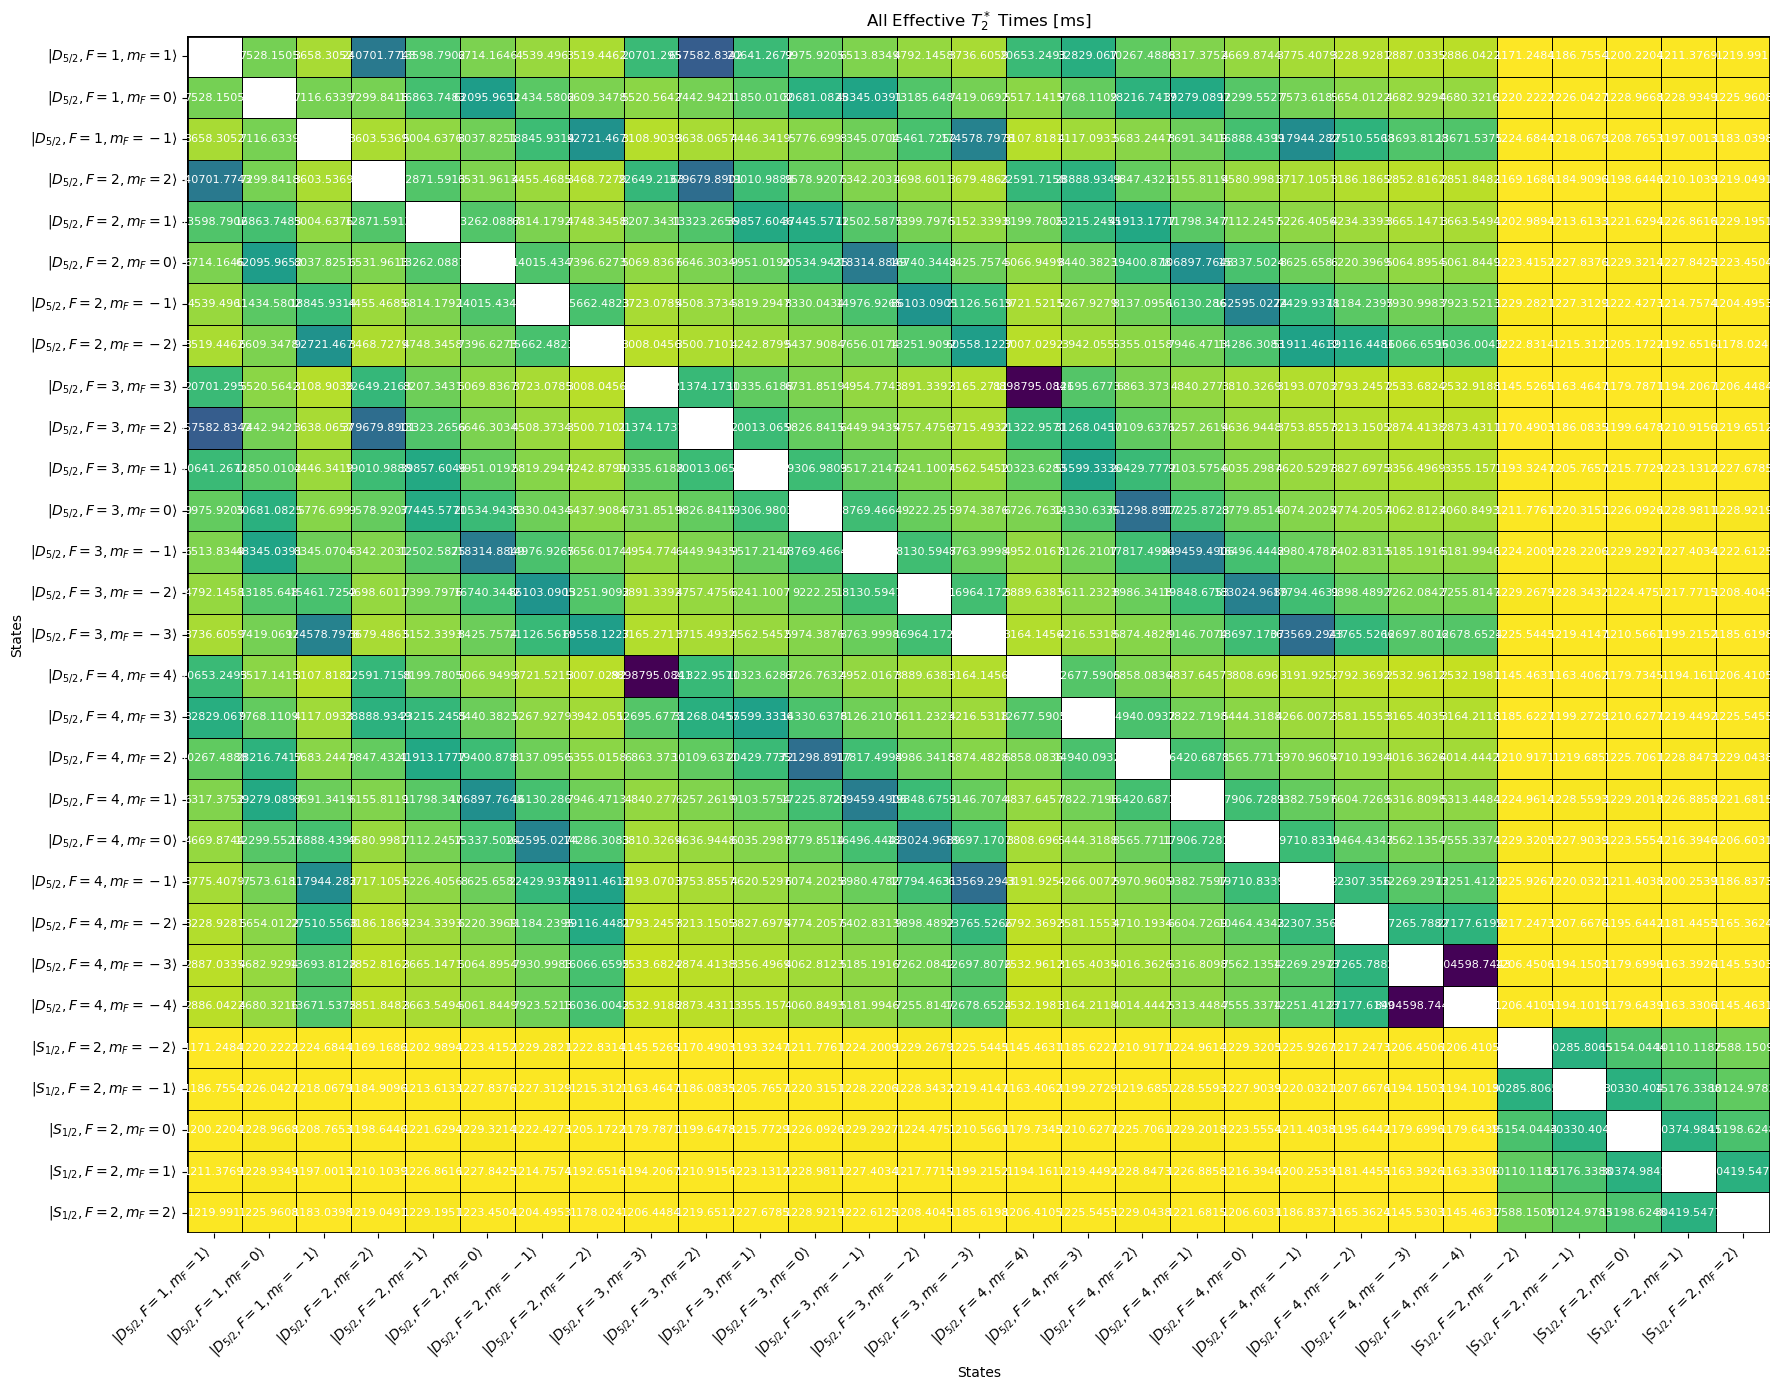

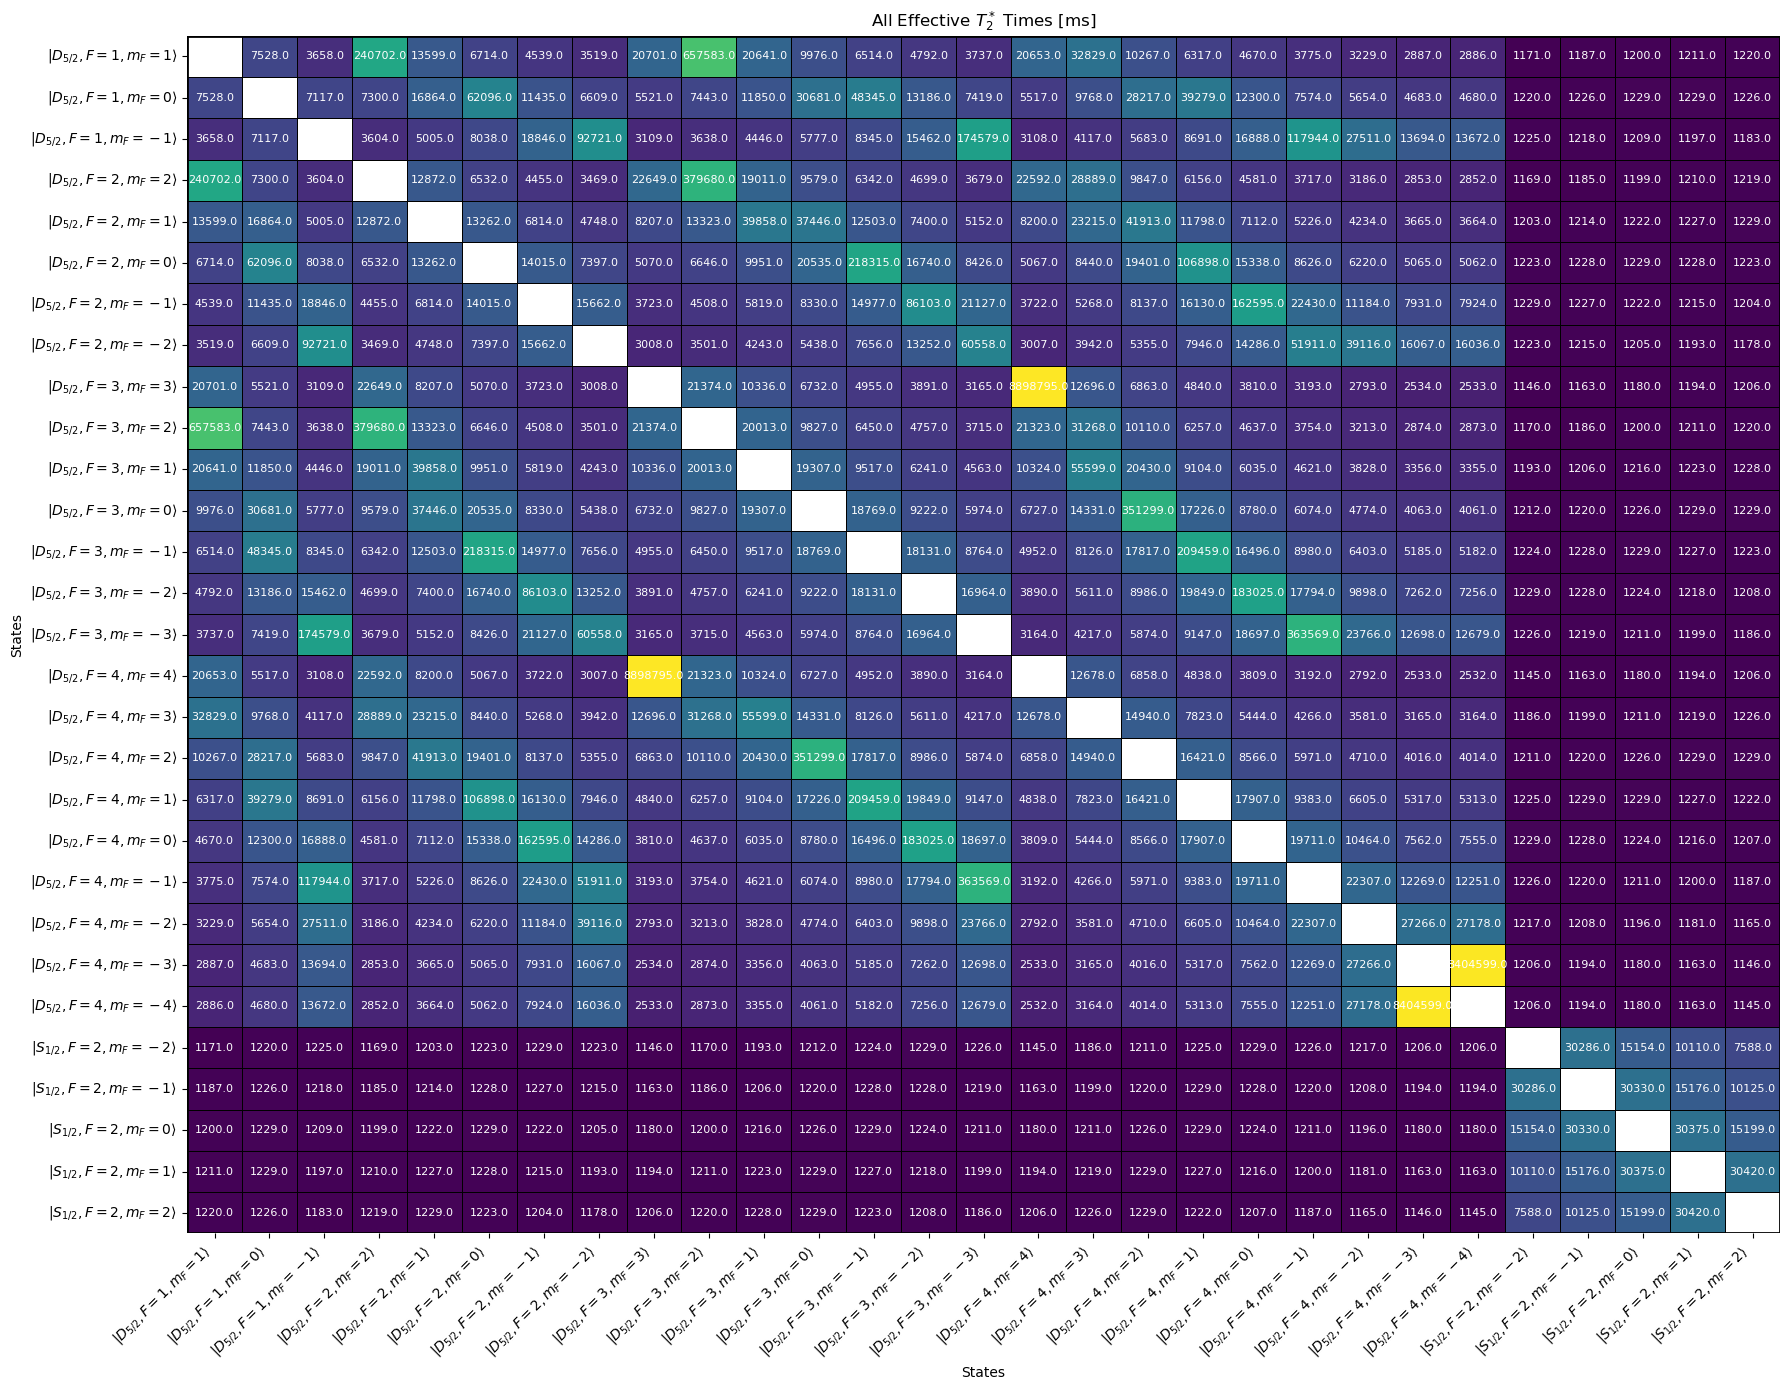

In [45]:
mat = scipy.io.loadmat('Full_sensitivity_matrix_with_lables.mat')
Sen_matrix = mat['Sen_matrix']
x_labels = [str(f'${label[0][0]}$') for label in mat['list_of_lables']]
y_labels = [str(f'${label[0][0]}$') for label in mat['list_of_lables']]

B_N = 4.7e-5
L_LN = 0.0005219
L_GN = 0.000487

L_LN_matrix = np.full((29, 29), L_LN)
L_GN_matrix = np.full((29, 29), L_GN)

L_LN_matrix[0:24, 0:24] = 0  # Adjust the slicing as needed
L_LN_matrix[-5:, -5:] = 0  # Adjust the slicing as needed

L_GN_matrix[0:24, 0:24] = 0  # Adjust the slicing as needed
L_GN_matrix[-5:, -5:] = 0  # Adjust the slicing as needed

T2_matrix =(-L_LN_matrix + np.sqrt(L_LN_matrix**2 + 4*((np.abs(Sen_matrix)*B_N)**2 + (L_GN_matrix**2))))/(2*((np.abs(Sen_matrix)*B_N)**2 + (L_GN_matrix**2)))
# T2_matrix = 1/(L_N + np.abs(Sen_matrix)*B_N)
pi_T2_times = pi_times_array/T2_matrix



effctive_sen_matrix = 1/T2_matrix
matrix = T2_matrix

plt.figure(figsize=(18, 14))  # Adjust figure size for better fit
ax = sns.heatmap(np.log(matrix), annot=False, fmt='.2f', cmap='viridis_r',
                 xticklabels=x_labels, yticklabels=y_labels, cbar=False, 
                 linewidths=0.5, linecolor='black')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('States')
plt.ylabel('States')
plt.title('All Effective $T_2^*$ Times [ms]')

for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        value = matrix[i, j] / matrix.max()  # Normalize the value to [0, 1] range
        ax.text(j + 0.5, i + 0.5, f'{np.round(matrix[i, j],4)}', 
                ha='center', va='center', color='white' if matrix[i, j] > 0.001  or np.isnan(matrix[i, j]) else 'black', fontsize=8)

ax.add_patch(Rectangle((0, 0), matrix.shape[1], matrix.shape[0], 
                       fill=False, edgecolor='black', linewidth=2))

# Adjust layout to fit everything neatly
plt.tight_layout()

# plt.savefig('All_effective_T2_times.pdf', dpi = 800)
plt.show()

matrix = T2_matrix

plt.figure(figsize=(18, 14))  # Adjust figure size for better fit
ax = sns.heatmap(np.log(matrix), annot=False, fmt='.2f', cmap='viridis',
                 xticklabels=x_labels, yticklabels=y_labels, cbar=False, 
                 linewidths=0.5, linecolor='black')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('States')
plt.ylabel('States')
plt.title('All Effective $T_2^*$ Times [ms]')

for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        value = matrix[i, j] / matrix.max()  # Normalize the value to [0, 1] range
        ax.text(j + 0.5, i + 0.5, f'{np.round(matrix[i, j])}', 
                ha='center', va='center', color='white' if matrix[i, j] > 0.001  or np.isnan(matrix[i, j]) else 'black', fontsize=8)

ax.add_patch(Rectangle((0, 0), matrix.shape[1], matrix.shape[0], 
                       fill=False, edgecolor='black', linewidth=2))

# Adjust layout to fit everything neatly
plt.tight_layout()

# plt.savefig('All_effective_T2_times.pdf', dpi = 800)
plt.show()

In [47]:
B = 4.7e-5
kB = (np.abs(Sen_matrix)*B)**2
L_G = (1/2054.4241218909024)**2
L_L = 1/1916.8500604713997

L_LN_matrix = np.full((29, 29), L_L)
L_GN_matrix = np.full((29, 29), L_G)

L_LN_matrix[0:24, 0:24] = 0  # Adjust the slicing as needed
L_LN_matrix[-5:, -5:] = 0  # Adjust the slicing as needed

L_GN_matrix[0:24, 0:24] = 0  # Adjust the slicing as needed
L_GN_matrix[-5:, -5:] = 0  # Adjust the slicing as needed


G_kB = plot_coupling_graph_from_matrix(kB, kB,show_graph=False)
G_L_G = plot_coupling_graph_from_matrix (L_GN_matrix,L_GN_matrix,show_graph=False)
G_L_L = plot_coupling_graph_from_matrix (L_LN_matrix,L_LN_matrix,show_graph=False)
G_pi_times = plot_coupling_graph_from_matrix(pi_times_array, pi_times_array,show_graph=False)

In [49]:
G_pi_times = plot_coupling_graph_from_matrix(pi_times_array, pi_times_array,show_graph=False)
G_sensitivities = plot_coupling_graph_from_matrix(effctive_sen_matrix, effctive_sen_matrix,show_graph=False)
# infidelity_matrix_29x29
G_buses = plot_coupling_graph_from_matrix(infidelity_matrix_29x29, infidelity_matrix_29x29,show_graph=False)

In [54]:
import networkx as nx
from itertools import combinations
import numpy as np

B = 4.7e-5
kB = (np.abs(Sen_matrix)*B)**2
L_G = (1/2054.4241218909024)**2
L_L = 1/1916.8500604713997

L_LN_matrix = np.full((29, 29), L_L)
L_GN_matrix = np.full((29, 29), L_G)

L_LN_matrix[0:24, 0:24] = 0  
L_LN_matrix[-5:, -5:] = 0 

L_GN_matrix[0:24, 0:24] = 0 
L_GN_matrix[-5:, -5:] = 0  

G_kB = plot_coupling_graph_from_matrix(kB, kB,show_graph=False)
G_L_G = plot_coupling_graph_from_matrix (L_GN_matrix,L_GN_matrix,show_graph=False)
G_L_L = plot_coupling_graph_from_matrix (L_LN_matrix,L_LN_matrix,show_graph=False)
G_pi_times = plot_coupling_graph_from_matrix(pi_times_array, pi_times_array,show_graph=False)
G_buses = plot_coupling_graph_from_matrix(sen_sq_matrix_29x29*(B**2), sen_sq_matrix_29x29*(B**2),show_graph=False)
G_infidelity = plot_coupling_graph_from_matrix(infidelity_matrix_29x29, infidelity_matrix_29x29,show_graph=False)

def find_original_path(list_of_paths, start_node, end_node):

    for path in list_of_paths:
        if start_node in path and end_node in path:
            start_idx = path.index(start_node)
            end_idx = path.index(end_node)
            if start_idx < end_idx:  # Ensure the path flows from start to end
                return path[start_idx:end_idx + 1]
    return None

def all_nodes_involved(nodes , list_of_paths = list_of_paths_og):

    # print(1,nodes)
    pairs = list(combinations(nodes, 2))
    unique_nodes = set()

    for start_node, end_node in pairs:
        path = find_original_path(list_of_paths, start_node, end_node)
        if path: 
            unique_nodes.update(path)

    return list(unique_nodes)


# Define global variables for graphs
GLOBAL_G_kB = G_kB
GLOBAL_G_L_G = G_L_G
GLOBAL_G_L_L = G_L_L
GLOBAL_G_pi_times = G_pi_times

def compute_cost(nodes_set):
    # Use global variables instead of passing them
    full_nodes_set = all_nodes_involved(nodes_set)
    dpb = len(full_nodes_set)
    subG_kB = GLOBAL_G_kB.subgraph(full_nodes_set)
    subG_L_G = GLOBAL_G_L_G.subgraph(full_nodes_set)
    subG_L_L = GLOBAL_G_L_L.subgraph(full_nodes_set)
    subG_pi = GLOBAL_G_pi_times.subgraph(full_nodes_set)

    sum_kB = sum(data.get('weight', 1) for u, v, data in subG_kB.edges(data=True))
    sum_L_G = sum(data.get('weight', 1) for u, v, data in subG_L_G.edges(data=True))
    sum_L_L = sum(data.get('weight', 1) for u, v, data in subG_L_L.edges(data=True))
    sum_pi = sum(data.get('weight', 1) for u, v, data in subG_pi.edges(data=True))

    cost = ((sum_L_L * sum_pi + sum_L_G * (sum_pi ** 2) + sum_kB * (sum_pi ** 2)) / dpb)
    return cost



def find_optimal_nodes(d):
    nodes = list(G_pi_times.nodes())
    min_cost = float('inf')
    best_combination = None

    # Total number of combinations
    total_combinations = len(list(combinations(nodes, d)))
    print(f"Total combinations to evaluate: {total_combinations}")

    for idx, nodes_set in enumerate(combinations(nodes, d)):
        # print(2,nodes_set)

        # print(3,full_nodes_set)
        cost = compute_cost(nodes_set) 

        if cost < min_cost:
            min_cost = cost
            best_combination = nodes_set

        # Optional: Print progress every 1000 iterations
        if idx % 1000 == 0 and idx > 0:
            print(f"Evaluated {idx} combinations so far...")

    print(f"\nBest combination of nodes: {best_combination}")
    print(f"Minimum cost: {min_cost}")

    return best_combination, min_cost
from multiprocessing import Pool

def find_optimal_nodes_parallel(d):
    nodes = list(G_pi_times.nodes())
    all_combinations = list(combinations(nodes, d))

    with Pool() as pool:
        results = pool.map(parallel_compute_cost, all_combinations)

    best_combination, min_cost = min(results, key=lambda x: x[1])

    print(f"\nBest combination of nodes: {best_combination}")
    print(f"Minimum cost: {min_cost}")
    return best_combination, min_cost

d = 4
best_nodes, min_cost = find_optimal_nodes(d)
# best_nodes, min_cost = find_optimal_nodes_parallel(d)

Total combinations to evaluate: 23751
Evaluated 1000 combinations so far...
Evaluated 2000 combinations so far...
Evaluated 3000 combinations so far...
Evaluated 4000 combinations so far...
Evaluated 5000 combinations so far...
Evaluated 6000 combinations so far...
Evaluated 7000 combinations so far...
Evaluated 8000 combinations so far...
Evaluated 9000 combinations so far...
Evaluated 10000 combinations so far...
Evaluated 11000 combinations so far...
Evaluated 12000 combinations so far...
Evaluated 13000 combinations so far...
Evaluated 14000 combinations so far...
Evaluated 15000 combinations so far...
Evaluated 16000 combinations so far...
Evaluated 17000 combinations so far...
Evaluated 18000 combinations so far...
Evaluated 19000 combinations so far...
Evaluated 20000 combinations so far...
Evaluated 21000 combinations so far...
Evaluated 22000 combinations so far...
Evaluated 23000 combinations so far...

Best combination of nodes: ('[3, -2]', '[3, -3]', '[4, -4]', '-2')
Minimu

In [56]:
import time
from itertools import combinations
from multiprocessing import Pool

def find_optimal_nodes(d):
    nodes = list(G_pi_times.nodes())
    min_cost = float('inf')
    best_combination = None

    # Total number of combinations
    total_combinations = len(list(combinations(nodes, d)))
    print(f"Total combinations to evaluate: {total_combinations}")

    start_time = time.time()  # Start timing
    for idx, nodes_set in enumerate(combinations(nodes, d)):
        cost = compute_cost(nodes_set)

        if cost < min_cost:
            min_cost = cost
            best_combination = nodes_set

        # Optional: Print progress every 1000 iterations
        if idx % 1000000 == 0 and idx > 0:
            print(f"Evaluated {idx} combinations so far...")

    end_time = time.time()  # End timing
    print(f"\nBest combination of nodes: {best_combination}")
    print(f"Minimum cost: {min_cost}")
    print(f"Time taken for find_optimal_nodes: {end_time - start_time:.2f} seconds")
    return best_combination, min_cost

def parallel_compute_cost(nodes_set):
    return (nodes_set, compute_cost(nodes_set))

def find_optimal_nodes_parallel(d):
    nodes = list(G_pi_times.nodes())
    all_combinations = list(combinations(nodes, d))

    start_time = time.time()  # Start timing
    with Pool() as pool:
        results = pool.map(parallel_compute_cost, all_combinations)

    best_combination, min_cost = min(results, key=lambda x: x[1])

    end_time = time.time()  # End timing
    print(f"\nBest combination of nodes: {best_combination}")
    print(f"Minimum cost: {min_cost}")
    print(f"Time taken for find_optimal_nodes_parallel: {end_time - start_time:.2f} seconds")
    return best_combination, min_cost

# Example Usage
d = 3

# Uncomment one of the following lines to test:
best_nodes, min_cost = find_optimal_nodes(d)
# best_nodes, min_cost = find_optimal_nodes_parallel(d)


Total combinations to evaluate: 3654

Best combination of nodes: ('[3, -3]', '[4, -4]', '-2')
Minimum cost: 0.04417882885430379
Time taken for find_optimal_nodes: 1.49 seconds


In [62]:
import networkx as nx
import numpy as np
import random

B = 4.7e-5
kB = (np.abs(Sen_matrix)*B)**2
L_G = (1/2054.4241218909024)**2
L_L = 1/1916.8500604713997

L_LN_matrix = np.full((29, 29), L_L)
L_GN_matrix = np.full((29, 29), L_G)

L_LN_matrix[0:24, 0:24] = 0  
L_LN_matrix[-5:, -5:] = 0 

L_GN_matrix[0:24, 0:24] = 0 
L_GN_matrix[-5:, -5:] = 0  

G_kB = plot_coupling_graph_from_matrix(kB, kB,show_graph=False)
G_L_G = plot_coupling_graph_from_matrix (L_GN_matrix,L_GN_matrix,show_graph=False)
G_L_L = plot_coupling_graph_from_matrix (L_LN_matrix,L_LN_matrix,show_graph=False)
G_pi_times = plot_coupling_graph_from_matrix(pi_times_array, pi_times_array,show_graph=False)
# G_buses = plot_coupling_graph_from_matrix(sen_sq_matrix_29x29*(B**2), sen_sq_matrix_29x29*(B**2),show_graph=False)
# G_infidelity = plot_coupling_graph_from_matrix(infidelity_matrix_29x29, infidelity_matrix_29x29,show_graph=False)

def all_nodes_involved(nodes, list_of_paths=list_of_paths_og):
    pairs = list(combinations(nodes, 2))
    unique_nodes = set()
    bus_nodes = set()
    for start_node, end_node in pairs:
        path = find_original_path(list_of_paths, start_node, end_node)
        if path: 
            # Convert each node in the path to a tuple if it's a list
            path = [tuple(node) if isinstance(node, list) else node for node in path]
            unique_nodes.update(path)
            bus_nodes.update(path[1:-1])  # Exclude start and end nodes
    return list(unique_nodes), list(bus_nodes)


def compute_cost(nodes_set):
    # Ensure all nodes are hashable (e.g., convert lists to tuples)
    full_nodes_set, _ = all_nodes_involved(nodes_set)
    full_nodes_set = [tuple(node) if isinstance(node, list) else node for node in full_nodes_set]

    dpb = len(full_nodes_set)
    subG_kB = G_kB.subgraph(full_nodes_set)
    subG_L_G = G_L_G.subgraph(full_nodes_set)
    subG_L_L = G_L_L.subgraph(full_nodes_set)
    subG_pi = G_pi_times.subgraph(full_nodes_set)

    sum_kB = sum(data.get('weight', 1) for u, v, data in subG_kB.edges(data=True))
    sum_L_G = sum(data.get('weight', 1) for u, v, data in subG_L_G.edges(data=True))
    sum_L_L = sum(data.get('weight', 1) for u, v, data in subG_L_L.edges(data=True))
    sum_pi = sum(data.get('weight', 1) for u, v, data in subG_pi.edges(data=True))

    cost = ((sum_L_L * sum_pi + sum_L_G * (sum_pi**2) + sum_kB * (sum_pi**2)) / dpb)
    return cost



def simulated_annealing_improved(G_pi_times, G_sensitivities, d, max_iter=50000, initial_temp=1000000, cooling_rate=0.0001):
    nodes = list(G_pi_times.nodes())
    current_solution = set(random.sample(nodes, d))
    current_cost = compute_cost(current_solution)
    best_solution = current_solution.copy()
    best_cost = current_cost
    temperature = initial_temp

    for iteration in range(max_iter):
        # Generate neighboring solution
        non_selected_nodes = list(set(nodes) - current_solution)
        if not non_selected_nodes:
            break

        # Replace one or two nodes randomly
        nodes_to_remove = random.sample(list(current_solution), k=min(2, len(current_solution)))
        nodes_to_add = random.sample(list(non_selected_nodes), k=len(nodes_to_remove))
        new_solution = current_solution.copy()
        new_solution.difference_update(nodes_to_remove)
        new_solution.update(nodes_to_add)

        new_cost = compute_cost(new_solution)
        delta_cost = new_cost - current_cost

        # Acceptance probability
        if delta_cost < 0 or random.uniform(0, 1) < np.exp(-delta_cost / temperature):
            current_solution = new_solution
            current_cost = new_cost
            if current_cost < best_cost:
                best_solution = current_solution.copy()
                best_cost = current_cost

        # Cool down adaptively
        temperature = temperature / (1 + cooling_rate * temperature)

        # Terminate if temperature is very low
        if temperature < 1e-6:
            break

        # Optional: Print progress every 1000 iterations
        if iteration % 5000 == 0:
            print(f"Iteration {iteration}, Current Cost: {current_cost}, Best Cost: {best_cost}")

    print(f"\nBest combination of nodes found: {best_solution}")
    print(f"Minimum cost: {best_cost}")

    return best_solution, best_cost


def simulated_annealing_with_restarts(G_pi_times, G_sensitivities, d, max_iter=20000, 
                                      initial_temp=600000, cooling_rate=0.001, num_restarts=10):

    best_overall_solution = None
    best_overall_cost = float('inf')

    for restart in range(num_restarts):
        print(f"\nRestart {restart + 1}/{num_restarts}")
        current_solution, current_cost = simulated_annealing_improved(
            G_pi_times, G_sensitivities, d, 
            max_iter=max_iter, initial_temp=initial_temp, cooling_rate=cooling_rate
        )

        if current_cost < best_overall_cost:
            best_overall_solution = current_solution
            best_overall_cost = current_cost

        print(f"Restart {restart + 1}: Best Cost = {current_cost}")

    print("\nOverall Best Solution:")
    print(f"Nodes: {best_overall_solution}")
    print(f"Cost: {best_overall_cost}")

    return best_overall_solution, best_overall_cost



def compute_node_sensitivities(G_sensitivities, nodes_set):
    node_sensitivities = {}
    # Create a subgraph induced by the selected nodes
    subG = G_sensitivities.subgraph(nodes_set)
    for node in nodes_set:
        # Sum the weights of all edges connected to the node within the subgraph
        total_sensitivity = sum(
            data.get('weight', 1) for _, _, data in subG.edges(node, data=True)
        )
        node_sensitivities[node] = total_sensitivity
    return node_sensitivities

# Set parameters
d = 7
num_restarts = 5  # Number of restarts

# Run simulated annealing with restarts
best_nodes, min_cost = simulated_annealing_with_restarts(
    G_pi_times, G_sensitivities, d, num_restarts=num_restarts
)

# Compute sensitivities for the best nodes
node_sensitivities = compute_node_sensitivities(G_sensitivities, best_nodes)

# Display ordered results
ordered_nodes = sorted(node_sensitivities.items(), key=lambda item: item[1])

print("\nBest nodes ordered by ascending sensitivity:")
ordered_states = []
for node, sensitivity in ordered_nodes:
    ordered_states.append(node)
    print(f"Node: {node}, Total Sensitivity: {sensitivity}")
ordered_states = [ast.literal_eval(item) for item in ordered_states]



Restart 1/5
Iteration 0, Current Cost: 138.5659854467494, Best Cost: 48.22787291734228
Iteration 5000, Current Cost: 1.7496842346240675, Best Cost: 1.7496842346240675
Iteration 10000, Current Cost: 1.7496842346240675, Best Cost: 1.7496842346240675
Iteration 15000, Current Cost: 1.7496842346240675, Best Cost: 1.7496842346240675

Best combination of nodes found: {'[4, 1]', '[2, -1]', '1', '[4, -1]', '[3, 2]', '[4, 0]', '[4, 2]'}
Minimum cost: 1.7496842346240675
Restart 1: Best Cost = 1.7496842346240675

Restart 2/5
Iteration 0, Current Cost: 120.3850158426323, Best Cost: 58.90325832667183
Iteration 5000, Current Cost: 2.211275493852951, Best Cost: 1.7371453612923535
Iteration 10000, Current Cost: 1.7371453612923535, Best Cost: 1.7371453612923535
Iteration 15000, Current Cost: 1.7371453612923535, Best Cost: 1.7371453612923535

Best combination of nodes found: {'[3, 3]', '[4, 1]', '1', '[4, -1]', '[3, 2]', '[4, 0]', '[4, 2]'}
Minimum cost: 1.7371453612923535
Restart 2: Best Cost = 1.73714

## cost = $\sum {\sum \tau_\pi \over T_2^*}$

In [ ]:
import networkx as nx
from itertools import combinations
import numpy as np

def compute_total_edge_weight(G, nodes_set):
    # Create a subgraph induced by the selected nodes
    subG = G.subgraph(nodes_set)
    # Sum the weights of all edges in the subgraph
    total_weight = sum(data.get('weight', 1) for u, v, data in subG.edges(data=True))
    return total_weight

def find_optimal_nodes(G_pi_times, G_sensitivities, d):
    nodes = list(G_pi_times.nodes())
    min_cost = float('inf')
    best_combination = None

    # Total number of combinations
    total_combinations = len(list(combinations(nodes, d)))
    print(f"Total combinations to evaluate: {total_combinations}")

    for idx, nodes_set in enumerate(combinations(nodes, d)):
        # print(nodes_set)
        sum_pi = compute_total_edge_weight(G_pi_times, nodes_set)
        sum_sen = compute_total_edge_weight(G_sensitivities, nodes_set)
        cost = sum_pi * sum_sen

        if cost < min_cost:
            min_cost = cost
            best_combination = nodes_set

        # Optional: Print progress every 1000 iterations
        if idx % 1000 == 0 and idx > 0:
            print(f"Evaluated {idx} combinations so far...")

    print(f"\nBest combination of nodes: {best_combination}")
    print(f"Minimum cost: {min_cost}")

    return best_combination, min_cost

d = 3
best_nodes, min_cost = find_optimal_nodes(G_pi_times, G_sensitivities, d)

In [ ]:
import networkx as nx
import numpy as np
import random

def compute_total_edge_weight(G, nodes_set):
    # Create a subgraph induced by the selected nodes
    subG = G.subgraph(nodes_set)
    # Sum the weights of all edges in the subgraph
    total_weight = sum(
        data.get('weight', 1) for _, _, data in subG.edges(data=True)
    )
    return total_weight

def cost_function(G_pi_times, G_sensitivities, nodes_set):
    sum_pi = compute_total_edge_weight(G_pi_times, nodes_set)
    sum_sen = compute_total_edge_weight(G_sensitivities, nodes_set)
    return sum_pi * sum_sen

def simulated_annealing(G_pi_times, G_sensitivities, d, max_iter=50000, initial_temp=10000, cooling_rate=0.001):
    nodes = list(G_pi_times.nodes())
    # Random initial solution
    current_solution = set(random.sample(nodes, d))
    current_cost = cost_function(G_pi_times, G_sensitivities, current_solution)
    best_solution = current_solution.copy()
    best_cost = current_cost
    temperature = initial_temp

    for iteration in range(max_iter):
        # Generate neighboring solution
        non_selected_nodes = list(set(nodes) - current_solution)
        if not non_selected_nodes:
            break
        node_to_remove = random.choice(tuple(current_solution))
        node_to_add = random.choice(non_selected_nodes)
        new_solution = current_solution.copy()
        new_solution.remove(node_to_remove)
        new_solution.add(node_to_add)
        new_cost = cost_function(G_pi_times, G_sensitivities, new_solution)

        # Acceptance probability
        delta_cost = new_cost - current_cost
        if delta_cost < 0 or random.uniform(0, 1) < np.exp(-delta_cost / temperature):
            current_solution = new_solution
            current_cost = new_cost
            # Update best solution
            if current_cost < best_cost:
                best_solution = current_solution.copy()
                best_cost = current_cost

        # Cool down
        temperature *= (1 - cooling_rate)

        # Optional: Print progress every 1000 iterations
        if iteration % 1000 == 0 and iteration > 0:
            print(f"Iteration {iteration}, Current Cost: {current_cost}, Best Cost: {best_cost}")

        # Terminate if temperature is very low
        if temperature < 1e-8:
            break

    print(f"\nBest combination of nodes found: {best_solution}")
    print(f"Minimum cost: {best_cost}")

    return best_solution, best_cost

def compute_node_sensitivities(G_sensitivities, nodes_set):
    node_sensitivities = {}
    # Create a subgraph induced by the selected nodes
    subG = G_sensitivities.subgraph(nodes_set)
    for node in nodes_set:
        # Sum the weights of all edges connected to the node within the subgraph
        total_sensitivity = sum(
            data.get('weight', 1) for _, _, data in subG.edges(node, data=True)
        )
        node_sensitivities[node] = total_sensitivity
    return node_sensitivities

# Example usage:
# Assuming you have G_pi_times and G_sensitivities already created
# Set the value of d
d = 12
best_nodes, min_cost = simulated_annealing(G_pi_times, G_sensitivities, d)

# Compute sensitivities for the selected nodes, considering only edges between them
node_sensitivities = compute_node_sensitivities(G_sensitivities, best_nodes)

ordered_nodes = sorted(node_sensitivities.items(), key=lambda item: item[1])

print("\nSelected nodes ordered by ascending sensitivity:")
for node, sensitivity in ordered_nodes:
    print(f"Node: {node}, Total Sensitivity: {sensitivity}")


In [ ]:
best_nodes_ordered_list = []
min_cost_list = []
for d in range(3,25):
    best_nodes, min_cost = simulated_annealing(G_pi_times, G_sensitivities, d)
    node_sensitivities = compute_node_sensitivities(G_sensitivities, best_nodes)
    ordered_nodes = sorted(node_sensitivities.items(), key=lambda item: item[1])
    best_nodes_ordered_list.append(ordered_nodes)
    min_cost_list.append(min_cost)

In [ ]:
import math

# Define the list of numbers
numbers = range(3,25)

# Calculate the factorial for each element in the list
factorials = np.array([math.factorial(num) for num in numbers])

print(factorials)

plt.figure()
plt.plot(range(3,25),min_cost_list/np.array(range(3,25)))
# plt.yscale("log")
plt.show()

In [ ]:
best_kets_for_d = []
for i in best_nodes_ordered_list:
    best_kets = []
    print('change')
    for j,k in i :
        print(j,k)
        best_kets.append(j)
    best_kets_for_d.append(best_kets)

In [82]:
d = 4
# for d in range(3,25):
D_kets = ['[4, -4]', '[3, -3]', '[3, -2]', '[3, -1]']#best_kets_for_d[d-3]
ket_0 = D_kets[0]
other_kets = D_kets[1:]

start_node = ket_0
paths = []
for i in other_kets:
    end_node = str(i)
    shortest_paths_with_weights = find_least_weight_paths(start_node, end_node,matrix = transition_strengths, weight_matrix = pi_times)
    fastest_path = min(shortest_paths_with_weights, key=lambda x: x[2])
    path = [ast.literal_eval(item) for item in fastest_path[0]]
    # print(fastest_path)
    paths.append(path)


col_labels = [-2,-1,0,1,2]
row_labels = []
for i in Fs:
    for j in range(2*i+1):
        mF = i-j
        row_labels.append([i,mF])
all_labels = row_labels + col_labels
def min_average_and_column_indices(matrix):

    sorted_indices = np.argsort(matrix, axis=1)

    return sorted_indices


sorted_indices = min_average_and_column_indices(pi_times_array[:,:])
probe_trans_dict = {}  # Initialize the dictionary if not done already

for j, label in enumerate(all_labels):
    if isinstance(label, list):
        label = label
    probe_trans_dict[str(label)] = [all_labels[i] for i in sorted_indices[j]]
# print(probe_trans_dict)
# print(probe_trans_dict['(2, 2)'])

probe_trans_list = []
for p in D_kets:
    # print(p)
    # print(probe_trans_dict[p][1])
    best_S12 = probe_trans_dict[p][1]
    # print(best_S12)
    if [best_S12,ast.literal_eval(p)[0],ast.literal_eval(p)[1]] not in probe_trans_list:
        probe_trans_list.append([best_S12,ast.literal_eval(p)[0],ast.literal_eval(p)[1]])

# print(probe_trans_list)

def get_trans(path):
    trans = []
    for i in range(len(path)-1):
        if isinstance(path[i], int):
            l = deque(path[i+1])
            l.appendleft(path[i])
            trans.append(list(l))
        if isinstance(path[i],list):
            l = deque(path[i])
            l.appendleft(path[i+1])
            trans.append(list(l))
    return trans
all_trans = []
for i in paths:
    all_trans.append(get_trans(i))
# print(all_trans)

def assign_states(transitions):
    unique_states = {}
    state_counter = 0

    for path in transitions:
        for transition in path:
            from_state = (transition[0],)
            to_state = tuple(transition[1:])
            if from_state not in unique_states:
                unique_states[from_state] = state_counter
                state_counter += 1
            if to_state not in unique_states:
                unique_states[to_state] = state_counter
                state_counter += 1

    return unique_states

def translate_transitions(transitions, unique_states):
    translated_paths = []
    all_couplings = []

    for path in transitions:
        translated_path = []
        for transition in path:
            from_state = (transition[0],)
            to_state = tuple(transition[1:])
            translated_from = unique_states[from_state]
            translated_to = unique_states[to_state]
            translated_path.append((translated_from, translated_to))
            all_couplings.append((translated_from, translated_to))
        translated_paths.append(translated_path)

    return translated_paths, all_couplings

def wrap_couplings(couplings):
    wrapped_couplings = []
    state_one_couplings = []
    other_couplings = []

    for coupling in couplings:
        if 1 in coupling:
            state_one_couplings.append(coupling)
        else:
            other_couplings.append(coupling)
    wrapped_couplings.extend(other_couplings[::-1])

    # if state_one_couplings:
    #     first_coupling = state_one_couplings.pop(0)
    #     wrapped_couplings.append((first_coupling[1], first_coupling[0]))  # Reverse first coupling

    wrapped_couplings.extend(state_one_couplings)
    wrapped_couplings.extend(other_couplings)

    return wrapped_couplings

# print(wrap_couplings([(0,1),(0,2)]))

transitions = all_trans

unique_states = assign_states(transitions)
translated_paths, all_couplings = translate_transitions(transitions, unique_states)

# Generate U1 and U2
U1 = all_couplings
U2 = []

# Print unique states and their assigned numbers
# print("Unique States and Assigned Numbers:")
# for state, number in unique_states.items():
#     print(f"State: {state}, Number: {number}")

# Print translated paths
# print("\nTranslated Paths:")
for path in translated_paths:
    U2.extend(wrap_couplings(path))
    # print(path)

# Print U1 and U2
# print("\nU1 (Original Couplings):")
# print(U1)

# print("\nU2 (Wrapped Couplings):")
U2.reverse()
# print(U2)

trans_mask_U1 = []
trans_mask_U2 = []
phase_mask_U2 = []
num_U1 = 1

comb_U = zip(U1,U2)
for i in U1:
    n1_U1=i[0]
    n2_U1=i[1]
    if n1_U1 ==1 or n2_U1 ==1:
        trans_mask_U1.append(num_U1)

        num_U1 = num_U1 +1
    else:
        trans_mask_U1.append(0)

num_U2 = max(trans_mask_U1)
phase_num =1
for j in U2:
    n1_U2=j[0]
    n2_U2=j[1]
    if n1_U2 ==1 or n2_U2 ==1:
        trans_mask_U2.append(num_U2)
        phase_mask_U2.append(phase_num)
        num_U2 = num_U2 - 1
        phase_num = phase_num + 1
    else:
        trans_mask_U2.append(0)
        phase_mask_U2.append(0)

# print('stimulated_phase_mask U1: ', list(0*np.array(trans_mask_U1)))

# print('stimulated_phase_mask U2: ',trans_mask_U2)
# print(phase_mask_U2)
# print(len(trans_mask_U1)+len(trans_mask_U2))

def translate_back(couplings, unique_states):
# Invert the unique_states dictionary to map numbers back to states
    number_to_state = {v: k for k, v in unique_states.items()}
    
    # Translate each coupling back to the original states
    original_couplings = []
    for from_state, to_state in couplings:
        original_from = number_to_state[from_state]
        original_to = number_to_state[to_state]
        original_couplings.append((original_from[0], original_to))
    
    return original_couplings



original_U1 = translate_back(U1, unique_states)
original_U2 = translate_back(U2, unique_states)

list_u1_trans = []
list_u2_trans = []

# Print the original state couplings
# print("\nOriginal U1:")
for from_state, to_state in original_U1:
    list_u1_trans.extend([[from_state,to_state[0],to_state[1]]])
    # print(f"({from_state}, {to_state})")
# print(list_u1_trans)
# print("\nOriginal U2:")
for from_state, to_state in original_U2:
    list_u2_trans.extend([[from_state,to_state[0],to_state[1]]])
    # print(f"({from_state}, {to_state})")
# print(list_u2_trans)

U1_times = get_pi_times(list_u1_trans)
# print(U1_times)
U2_times= get_pi_times(list_u2_trans)
total_time = U1_times + U2_times
# print(sum(U1_times))
# print(sum(U2_times))
corrected_times_U1 = [] 
fractions_U1 = [] 
for i,coup in enumerate(U1):
    n_ = trans_mask_U1[i]
    Rabi_frequencies = np.pi/U1_times[i]
    n1 = coup[0]
    n2 = coup[1]
    if n1 == 1 or n2 == 1:
        time = 2*np.arccos(np.sqrt(((d-n_)/ (d + 1 - n_))))*U1_times[i]/np.pi
        fractions_U1.append(1 - (d-n_)/ (d + 1 - n_))
    else:
        time  = 2*np.arcsin(1)*U1_times[i]/np.pi
        fractions_U1.append(1)
    corrected_times_U1.append(time)

# print('Fractions U1: ', fractions_U1)

# print(corrected_times_U1)

corrected_times_U2 = [] 
fractions_U2 = []
for i,coup in enumerate(U2):
    n_ = trans_mask_U2[i]
    Rabi_frequencies = np.pi/U2_times[i]
    n1 = coup[0]
    n2 = coup[1]
    if n1 == 1 or n2 == 1:
        time = 2*np.arccos(np.sqrt(((d-n_)/ (d + 1 - n_))))/Rabi_frequencies
        fractions_U2.append(1-(d-n_)/ (d + 1 - n_))
    else:
        time  = 2*(np.arcsin(1)/Rabi_frequencies)
        fractions_U2.append(1)
    corrected_times_U2.append(time)
# print('Fractions U2: ', fractions_U2)
# print(corrected_times_U2)

fixed_phase_mask_U1 = []
sec_one = 0
for i in fractions_U1:
    if i != 1:
        fixed_phase_mask_U1.append(1)
        sec_one = 0
    elif i == 1 and not sec_one:
        fixed_phase_mask_U1.append(0)
        sec_one = 1
    elif i==1 and sec_one:
        fixed_phase_mask_U1.append(1)
        sec_one = 0
fixed_phase_mask_U2 = []
sec_one = 0
for i in fractions_U2:
    if i != 1:
        fixed_phase_mask_U2.append(0)
    elif i == 1 and not sec_one:
        fixed_phase_mask_U2.append(1)
        sec_one = 1
    elif i==1 and sec_one:
        fixed_phase_mask_U2.append(0)
        sec_one = 0

# print(fixed_phase_mask_U1)
# print(fixed_phase_mask_U2)
print(
f'''
== D = {d} ==
<syntaxhighlight lang="python">
initial_state = {[list_u1_trans[0]]}

pulse_train_U1 = {list_u1_trans}
fractions_U1 = {fractions_U1}
simulated_phase_mask_U1 = {list(0*np.array(trans_mask_U1))}
fixed_phase_mask_U1 = {fixed_phase_mask_U1}

pulse_train_U2 = {list_u2_trans}
fractions_U2 = {fractions_U2}
simulated_phase_mask_U2 = {trans_mask_U2}
fixed_phase_mask_U2 = {fixed_phase_mask_U2}

full_pi_times_list = {total_time}
probe_trans = {probe_trans_list}
</syntaxhighlight>
'''

    
)


== D = 4 ==
<syntaxhighlight lang="python">
initial_state = [[0, 4, -4]]

pulse_train_U1 = [[0, 4, -4], [0, 3, -3], [1, 4, -4], [1, 3, -2], [2, 4, -4], [2, 3, -1]]
fractions_U1 = [0.25, 1, 0.33333333333333337, 1, 0.5, 1]
simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0]
fixed_phase_mask_U1 = [1, 0, 1, 0, 1, 0]

pulse_train_U2 = [[2, 3, -1], [2, 4, -4], [2, 3, -1], [1, 3, -2], [1, 4, -4], [1, 3, -2], [0, 3, -3], [0, 4, -4], [0, 3, -3]]
fractions_U2 = [1, 0.5, 1, 1, 0.33333333333333337, 1, 1, 0.25, 1]
simulated_phase_mask_U2 = [0, 3, 0, 0, 2, 0, 0, 1, 0]
fixed_phase_mask_U2 = [1, 0, 0, 1, 0, 0, 1, 0, 0]

full_pi_times_list = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
probe_trans = [[-2, 4, -4], [-2, 3, -3], [-2, 3, -2], [-1, 3, -1]]
</syntaxhighlight>



C:\Users\Gaurav\AppData\Local\Temp\ipykernel_21220\2543585862.py:234: RuntimeWarning: divide by zero encountered in scalar divide
  Rabi_frequencies = np.pi/U1_times[i]
C:\Users\Gaurav\AppData\Local\Temp\ipykernel_21220\2543585862.py:253: RuntimeWarning: divide by zero encountered in scalar divide
  Rabi_frequencies = np.pi/U2_times[i]


## Encoding $|0 \rangle$ in $6S_{1 \over 2}$ 

In [ ]:
# Find first 1 digit state and remaining states
print(ordered_states)
for state in ordered_states:
    if isinstance(state, int):  # Check if first element is a single digit
        ket_0 = state
        other_kets = [s for s in ordered_states if s != state]  # Get remaining states
        break

print('ket_0 = ',ket_0,'\n','other_states = ', other_kets)

In [ ]:
# def Min_average_sensitivity_average_pitime(d, S12_only = False, matrix_sen = np.abs(effctive_sen_matrix), matrix_pi = pi_times_array):
#     col_labels = [-2,-1,0,1,2]
#     row_labels = []
#     Fs = [1,2,3,4]
#     for i in Fs:
#         for j in range(2*i+1):
#             mF = i-j
#             row_labels.append([i,mF])
#     all_labels = row_labels + col_labels
    
#     if S12_only:
#         crop = -5
#         print("cropped")
#     else:
#         print("not_cropped")
#         crop = 0
#     matrix_sen = matrix_sen[crop:,:-5]
#     matrix_pi = matrix_pi[crop:,:-5]
#     all_labels_cropped = all_labels[crop:]
    
#     sorted_indices_sen = np.argsort(matrix_sen, axis=1)

#     first_d_col_indices_sen = sorted_indices_sen[:, :d]

#     first_d_elements_sen = np.take_along_axis(matrix_sen, first_d_col_indices_sen, axis=1)

#     row_averages_sen = np.mean(first_d_elements_sen, axis=1)

#     sorted_indices_pi = np.argsort(matrix_pi, axis=1)

#     first_d_col_indices_pi = sorted_indices_pi[:, :d]

#     first_d_elements_pi = np.take_along_axis(matrix_pi, first_d_col_indices_sen, axis=1)

#     row_averages_pi = np.mean(first_d_elements_pi, axis=1)
#     print(row_averages_pi, row_averages_sen)
#     combined_row_averages = row_averages_pi * row_averages_sen
#     print(combined_row_averages)
#     min_avg = np.min(combined_row_averages)
#     print(min_avg)
#     min_avg_row_number = np.argmin(combined_row_averages)  
#     print(min_avg_row_number)
#     ket_0 =  str(all_labels_cropped[min_avg_row_number])
    
#     min_avg_col_indices = first_d_col_indices_sen[min_avg_row_number]
#     other_kets = [all_labels[i] for i in min_avg_col_indices]
    
#     all_indices_sorted = sorted_indices_sen[min_avg_row_number]
#     all_states = [all_labels[i] for i in all_indices]
    
#     return min_avg, min_avg_row_number, min_avg_col_indices, ket_0, other_kets, all_states

In [ ]:
# d = 8
# # print(Min_average_sensitivity_average_pitime(d-1))
# _,_,_,ket_0,other_kets,all_states = Min_average_sensitivity_average_pitime(d-1,S12_only = True)
# print("start_node:", ket_0)
# print("other_ket:", other_kets)
# print('all_states: ',all_states)

In [ ]:
import numpy as np
col_labels = [-2,-1,0,1,2]
row_labels = []
for i in Fs:
    for j in range(2*i+1):
        mF = i-j
        row_labels.append([i,mF])
all_labels = row_labels + col_labels
def min_average_and_column_indices(matrix):

    sorted_indices = np.argsort(matrix, axis=1)

    return sorted_indices

# Example usage:
matrix = np.random.randint(0, 100, (29, 29))  # Create a 29x29 matrix with random integers
 # Example dimension

sorted_indices = min_average_and_column_indices(pi_times_array[:,:])
probe_trans_dict = {}  # Initialize the dictionary if not done already

for j, label in enumerate(all_labels):
    # Convert `label` to a tuple if it's a list
    if isinstance(label, list):
        label = tuple(label)
    probe_trans_dict[label] = [all_labels[i] for i in sorted_indices[j]]

print(probe_trans_dict[(2,2)])

In [ ]:
# import numpy as np
# col_labels = [-2,-1,0,1,2]
# row_labels = []
# for i in Fs:
#     for j in range(2*i+1):
#         mF = i-j
#         row_labels.append([i,mF])
# all_labels = row_labels + col_labels
# def min_average_and_column_indices(matrix, d):

#     sorted_indices = np.argsort(matrix, axis=1)

#     first_d_col_indices = sorted_indices[:, :d]

#     first_d_elements = np.take_along_axis(matrix, first_d_col_indices, axis=1)

#     row_averages = np.mean(first_d_elements, axis=1)

#     min_avg = np.min(row_averages)
#     min_avg_row_number = np.argmin(row_averages)  

#     min_avg_col_indices = first_d_col_indices[min_avg_row_number]

#     return min_avg, min_avg_row_number, min_avg_col_indices, sorted_indices[min_avg_row_number]

# # Example usage:
# matrix = np.random.randint(0, 100, (29, 29))  # Create a 29x29 matrix with random integers
# d =3  # Example dimension

# crop = -5

# min_avg, min_avg_row_number, min_avg_col_indices, all_indices = min_average_and_column_indices(pi_T2_times[crop:,:-5], d-1)
# print(min_avg, min_avg_row_number, min_avg_col_indices, all_indices)
# ket_0 =  str(all_labels[crop:][min_avg_row_number])
# other_kets = [all_labels[i] for i in min_avg_col_indices]
# all_states = [all_labels[i] for i in all_indices]
# print("Minimum average of the first", d, "elements:", min_avg)
# print("start_node:", ket_0)
# print("other_ket:", other_kets)
# print('all_states: ',all_states)

    


In [ ]:
def plot_coupling_graph_from_matrix(matrix,transition_strengths = transition_strengths, pos=None, show_graph = True):

    rows, cols = matrix.shape

    # Create a bipartite graph
    G = nx.Graph()
    Fs = [1, 2, 3, 4]
    row_labels = []
    for i in Fs:
        for j in range(2 * i + 1):
            mF = i - j
            row_labels.append([i, mF])
    col_labels = [-2, -1, 0, 1, 2]

    # Add edges based on non-zero elements in the matrix and assign weights
    for i in range(rows):
        for j in range(cols):
            if matrix[i, j] != 0 and matrix[i,j]!=np.nan:
                # print(transition_strengths[i, j])
                G.add_edge(f"{row_labels[i]}", f"{col_labels[j]}", weight=transition_strengths[i, j])

    # Generate positions for the nodes
    if pos is None:
        pos = {
            '-2': (-2, -2),
            '-1': (-1, -2),
            '0': (0, -2),
            '1': (1, -2),
            '2': (2, -2),
        }
    for i in row_labels:
        pos[f"{i}"] = (i[1], abs(i[0] - 4))
    for i in row_labels:
        G.add_node(f"{i}", pos=pos[f'{i}'])
    for j in col_labels:
        G.add_node(f"{j}", pos=pos[f'{i}'])
    if show_graph:
        colors = list(mcolors.TABLEAU_COLORS.values())
    
        plt.figure(figsize=(10, 7))
    
        for j in range(cols):
            edges = [(f"{row_labels[i]}", f"{col_labels[j]}") for i in range(rows) if matrix[i, j] != 0]
            weights = [matrix[i, j] for i in range(rows) if matrix[i, j] != 0]
            nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=colors[j % len(colors)], width=2, alpha=0.6)
    
        # Draw nodes with rectangular patches
        xh = 0.5
        yh = 0.25
        ax = plt.gca()
        for node, (x, y) in pos.items():
            ax.add_patch(Rectangle((x - xh / 2, y - yh / 2), xh, yh, fill=True, color='black', ec='black', lw=1))
    
        nx.draw_networkx_labels(G, pos, font_size=10, font_color='white')
    
        # Draw edge labels (weights)
        # edge_labels = nx.get_edge_attributes(G, 'weight')
        # nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    
        plt.xlim(-4.5, 4.5)
        plt.ylim(-2.5, 3.5)
    
        # Show the plot
        plt.title('Coupling Graph from Matrix')
        plt.show()

    return G


from collections import deque

def find_shortest_paths_with_min_weight(start_node, end_node,matrix = all_trans,weight_matrix = transition_strengths,  min_weight=0):
    G = plot_coupling_graph_from_matrix(matrix, weight_matrix, show_graph=False)
    G_strength = plot_coupling_graph_from_matrix(matrix, transition_strengths, show_graph=False)
    queue = deque([[start_node]])
    shortest_paths = []
    shortest_length = float('inf')

    while queue:
        path = queue.popleft()
        node = path[-1]

        if node == end_node:
            path_length = len(path)
            list_of_weights = [G[path[i]][path[i + 1]]['weight'] for i in range(len(path) - 1)]
            total_weight_product = np.sum([G[path[i]][path[i + 1]]['weight'] for i in range(len(path) - 1)])
            # print([G[path[i]][path[i + 1]]['weight'] for i in range(len(path) - 1)],np.prod([G[path[i]][path[i + 1]]['weight'] for i in range(len(path) - 1)]))
            # if path_length < shortest_length:
            #     shortest_paths = [(path, path_length, total_weight_product)]
            #     shortest_length = path_length
            # elif path_length == shortest_length:
            shortest_paths.append((path, path_length, total_weight_product,list_of_weights))

        else:
            for neighbor in G.neighbors(node):
                # print(neighbor)
                # print(path)
                if neighbor not in path:  # Avoid cycles
                    edge_weight = G_strength[node][neighbor]['weight']
                    if edge_weight >= min_weight:
                        new_path = list(path)
                        new_path.append(neighbor)
                        queue.append(new_path)
        if len(shortest_paths) > 500:
            break
    return shortest_paths


start_node = str(ket_0)
paths = []
for i in other_kets:
    end_node = str(i)
    shortest_paths_with_weights = find_shortest_paths_with_min_weight(start_node, end_node,matrix = transition_strengths, weight_matrix = pi_times)
    fastest_path = min(shortest_paths_with_weights, key=lambda x: x[2])
    path = [ast.literal_eval(item) for item in fastest_path[0]]
    print(fastest_path)
    paths.append(path)


    
    
# used_as_bus = []
# for j in other_kets:
#     for path in paths:    
#         if j in path[1:-2]:
#             if j not in used_as_bus:
#                 used_as_bus.append(j)
#                 print('state used as bus: ', j)

# filtered_paths = [
#     path for path in paths if path[-1] not in used_as_bus
# ]

# last_state_used = other_kets[-1]
# last_index_used = all_states.index(last_state_used)

# extra_states = all_states[last_index_used+1: last_index_used+1+len(used_as_bus)]
# print(extra_states)
# for i in extra_states:
#     end_node = str(i)
#     shortest_paths_with_weights = find_shortest_paths_with_min_weight(start_node, end_node,matrix = transition_strengths, weight_matrix = pi_times)
#     sorted_shortest_paths = sorted(shortest_paths_with_weights, key=lambda x: x[2])
#     # print(sorted_shortest_paths)
#     worked = 1
#     for dummy_ind in range(len(sorted_shortest_paths)):
#         print('trying:',sorted_shortest_paths[dummy_ind][0])
#         for j in other_kets:
#             ends = str(j)
#             # print(sorted_shortest_paths[dummy_ind][0][1:-2])
#             if ends  in sorted_shortest_paths[dummy_ind][0][1:-2]:
#                 worked = 0
#         if worked:
#             fastest_path = sorted_shortest_paths[dummy_ind]
#             path = [ast.literal_eval(item) for item in fastest_path[0]]
#             print(fastest_path)
#             filtered_paths.append(path)
#             print('end_node works: ',end_node)
#             break

                

In [ ]:
print(paths)
data = paths
# Separate lists: one with a third entry, and one without
with_third = [item for item in data if len(item) > 2]
without_third = [item for item in data if len(item) <= 2]

# Sort the list with a third entry by the third element
with_third_sorted = sorted(with_third, key=lambda x: x[2])

# Combine the lists: first the items without a third entry, then the sorted ones
sorted_paths = without_third + with_third_sorted

# Display the result
print("Sorted List:")
for item in sorted_paths:
    print(item)


In [ ]:
single_digit_states = []
for path in sorted_paths:
    for i in range(len(path) - 1):
        if isinstance(path[i], int) and path[i] not in single_digit_states:
            single_digit_states.append(path[i])
print(single_digit_states)
S12_paths = []
for i in range(len(single_digit_states)-1):
    start_node = str(single_digit_states[i])
    end_node =  str(single_digit_states[i+1])
    shortest_paths_with_weights = find_shortest_paths_with_min_weight(start_node, end_node,matrix = transition_strengths, weight_matrix = pi_times)
    fastest_path = min(shortest_paths_with_weights, key=lambda x: x[2])
    path = [ast.literal_eval(item) for item in fastest_path[0]]
    print(fastest_path)
    S12_paths.append(path)
print(S12_paths)

In [ ]:
paths = sorted_paths
# Stores the modified paths
new_paths = []
# Track bus states and ensure they are added only once before bus usage
bus_inserted_once = set()
bus_needed_later = {tuple(path[1]) for path in S12_paths if len(path) > 2}  # Get all bus states that will be used in transitions
S12_state_reached = []

stimulated_phase_mask = []
fixed_phase_mask = []
fractions = []
# fractions.append(1 / (d + 1 - n))
n = 1
for path in paths:
    if len(path) > 2:
        bus_state = tuple(path[1])  # Convert to tuple for set handling
        initial_state = path[0]  # The state before the bus
        transition_state = path[2]  # The state we move to after the bus
        bus_state = tuple([sublist[1] for sublist in S12_paths if len(sublist) > 2 and sublist[2] == transition_state][0])
        initial_state = [sublist[0] for sublist in S12_paths if len(sublist) > 2 and sublist[2] == transition_state][0]
        # print(result)

        if bus_state not in bus_inserted_once:
            print(1,[initial_state, list(bus_state)])
            new_paths.append([initial_state, list(bus_state)])
            fractions.append(1)
            stimulated_phase_mask.append(0)
            fixed_phase_mask.append(0)
            bus_inserted_once.add(bus_state)
        if transition_state not in S12_state_reached:
            print(2,[transition_state, list(bus_state)])
            new_paths.append([transition_state, list(bus_state)])
            fractions.append(1)
            stimulated_phase_mask.append(0)
            fixed_phase_mask.append(1)
            if list(bus_state) in other_kets:
                print(2.5,[transition_state, list(bus_state)])
                new_paths.append([transition_state, list(bus_state)])
                stimulated_phase_mask.append(n-1)
                fixed_phase_mask.append(0)
                fractions.append(1 / (d + 1 - n))
                n = n + 1
            S12_state_reached.append(transition_state)
        if path[3] in other_kets:
            print(3,[transition_state, path[3]])
            new_paths.append([transition_state, path[3]])
            fractions.append(1 / (d + 1 - n))
            stimulated_phase_mask.append(n-1)
            fixed_phase_mask.append(0)
            n = n + 1
    
    else:
        simple_path_state = tuple(path[1])
        if simple_path_state not in bus_needed_later:
            print(5,path)
            new_paths.append(path)
            fractions.append(1 / (d + 1 - n))
            stimulated_phase_mask.append(n-1)
            fixed_phase_mask.append(0)
            n = n + 1

# Display the updated list of paths
probe_trans_list = []
for p in new_paths:
    best_S12 = probe_trans_dict[(p[1][0],p[1][1])][0]
    if [best_S12,p[1]] not in probe_trans_list:
        probe_trans_list.append([best_S12,p[1]])
    # print(p)
def get_trans(path):
    trans = []
    for i in range(len(path)-1):
        if isinstance(path[i], int):
            l = deque(path[i+1])
            l.appendleft(path[i])
            trans.append(list(l))
        if isinstance(path[i],list):
            l = deque(path[i])
            l.appendleft(path[i+1])
            trans.append(list(l))
    return trans
probe_trans = []
for i in probe_trans_list:
    probe_trans.append(get_trans(i))


In [ ]:
def get_trans(path):
    trans = []
    for i in range(len(path)-1):
        if isinstance(path[i], int):
            l = deque(path[i+1])
            l.appendleft(path[i])
            trans.append(list(l))
        if isinstance(path[i],list):
            l = deque(path[i])
            l.appendleft(path[i+1])
            trans.append(list(l))
    return trans
all_trans = []
for i in new_paths:
    all_trans.append(get_trans(i))

U1_pulse_train = [path[0] for path in all_trans]
print('initial_state =', [U1_pulse_train[0]])
print('pulse_train_U1 =',[U1_pulse_train[0]]+U1_pulse_train)
print('fractions_U1 =', [1]+fractions)
print('simulated_phase_mask_U1 =',[0]+list(np.array(stimulated_phase_mask)*0))
print('fixed_phase_mask_U1 =',[0]+fixed_phase_mask)
print('probe_trans =',[trans[0] for trans in probe_trans])

In [ ]:
new_paths_U2 = []

stimulated_phase_mask_U2 = []
fixed_phase_mask_U2 = []
fractions_U2 = []
# fractions.append(1 / (d + 1 - n))
state_repeated = 0
state_repeated_twice = 0
reversed_U1 = new_paths[::-1]
n = d-1
for i,path in enumerate(reversed_U1):
        if i>1:
            D_state = path[1]
            s_state = path[0]
            if D_state == reversed_U1[i-1][1] and D_state == reversed_U1[i-2][1]:
                state_repeated_twice = 1
                state_repeated = 0
            elif D_state == reversed_U1[i-1][1]:
                state_repeated = 1
                state_repeated_twice = 0
            else: 
                state_repeated = 0
                state_repeated_twice = 0
        if state_repeated:
            # print('state repeated',D_state)
            new_paths_U2.append(path)
            stimulated_phase_mask_U2.append(0)
            fixed_phase_mask_U2.append(0)
            fractions_U2.append(1)
            print('1',path)
        if state_repeated_twice: 
            new_paths_U2.append(path)
            stimulated_phase_mask_U2.append(0)
            fixed_phase_mask_U2.append(1)
            fractions_U2.append(1)
            print('1.5',path)
            new_paths_U2.append(reversed_U1[i-1])
            stimulated_phase_mask_U2.append(0)
            fixed_phase_mask_U2.append(0)
            fractions_U2.append(1)
            # fractions_U2.append(1 / (d + 1 - n))
            print('2',reversed_U1[i-1])
        if not state_repeated and not state_repeated_twice:
            new_paths_U2.append(path)
            stimulated_phase_mask_U2.append(n)
            fixed_phase_mask_U2.append(1)
            # print(n)
            fractions_U2.append(1 / (d + 1 - n))
            n = n - 1
            print('3',path)
        


In [ ]:
def get_trans(path):
    trans = []
    for i in range(len(path)-1):
        if isinstance(path[i], int):
            l = deque(path[i+1])
            l.appendleft(path[i])
            trans.append(list(l))
        if isinstance(path[i],list):
            l = deque(path[i])
            l.appendleft(path[i+1])
            trans.append(list(l))
    return trans
all_trans = []
for i in new_paths_U2:
    all_trans.append(get_trans(i))

print('<syntaxhighlight lang="python">')
print('initial_state =', [U1_pulse_train[0]])
print('pulse_train_U1 =',[U1_pulse_train[0]]+U1_pulse_train)
print('fractions_U1 =', [1]+fractions)
print('simulated_phase_mask_U1 =',[0]+list(np.array(stimulated_phase_mask)*0))
print('fixed_phase_mask_U1 =',[1]+fixed_phase_mask)
print('probe_trans =',[trans[0] for trans in probe_trans])
print('pulse_train_U2 = ',[path[0] for path in all_trans])
print('fractions_U2 =', fractions_U2)
print('simulated_phase_mask_U2 =',stimulated_phase_mask_U2)
print('fixed_phase_mask_U2 =',fixed_phase_mask_U2)
print('</syntaxhighlight>')

## Operation Animation

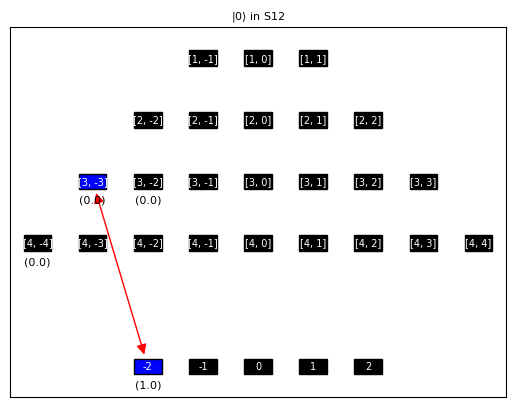

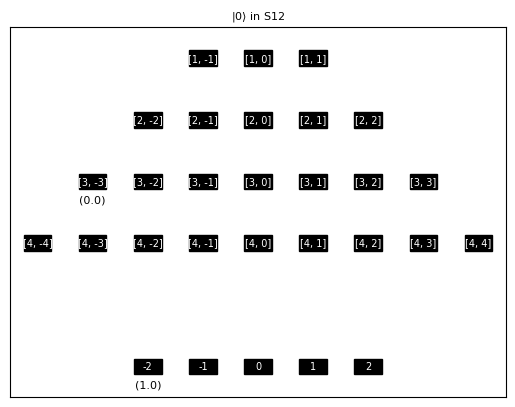

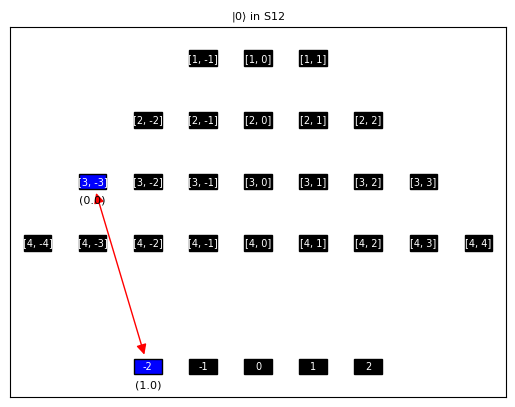

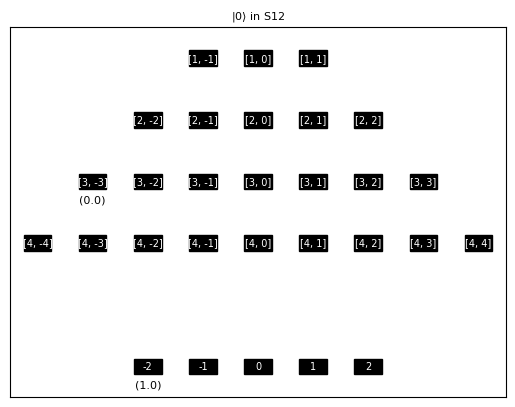

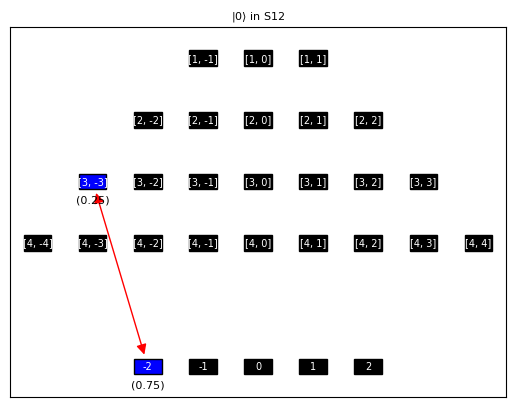

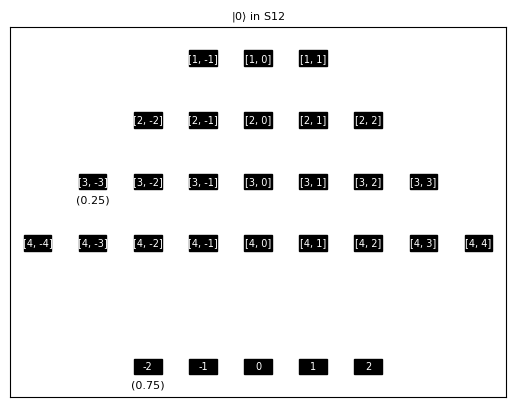

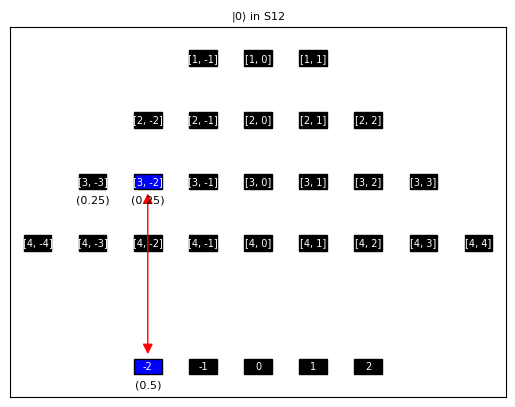

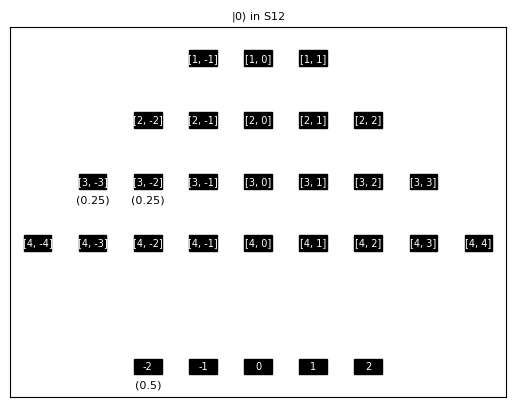

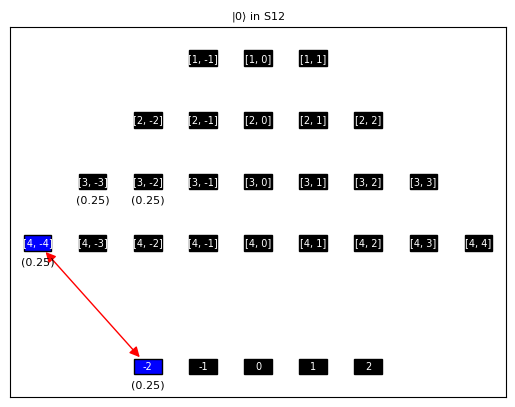

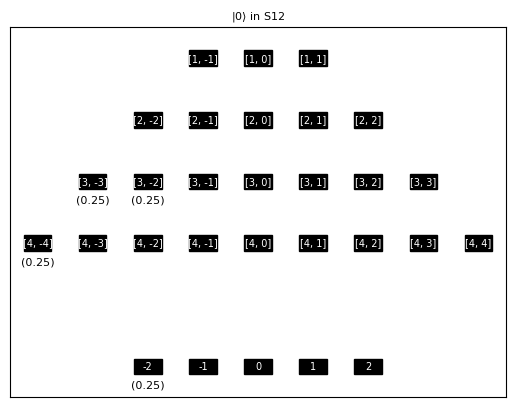

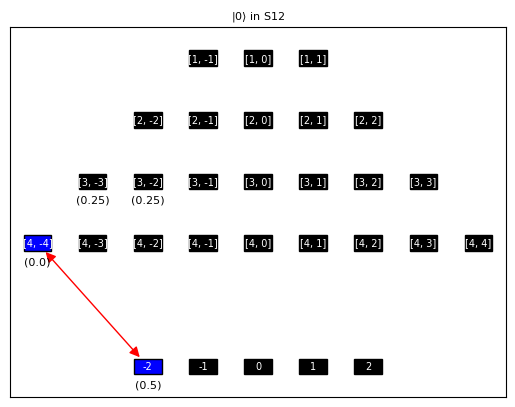

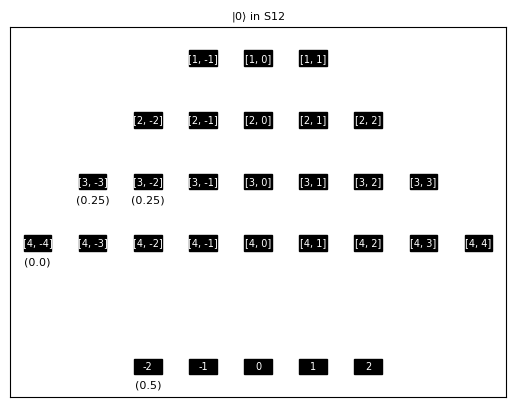

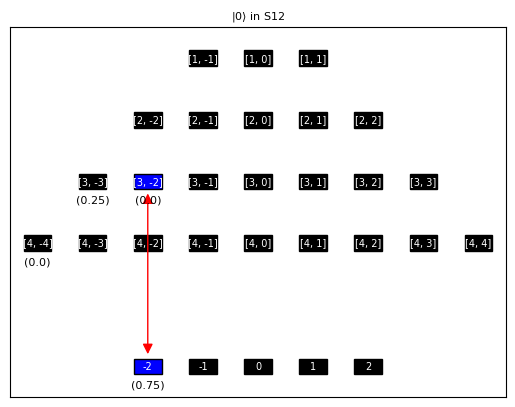

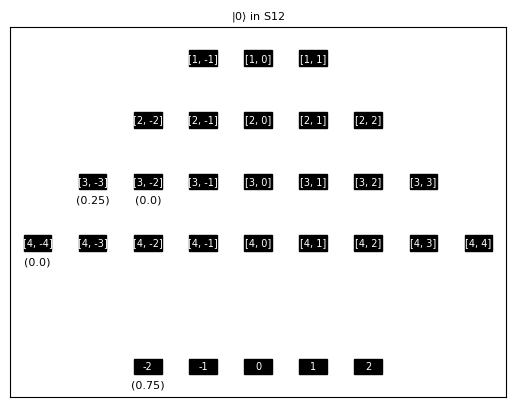

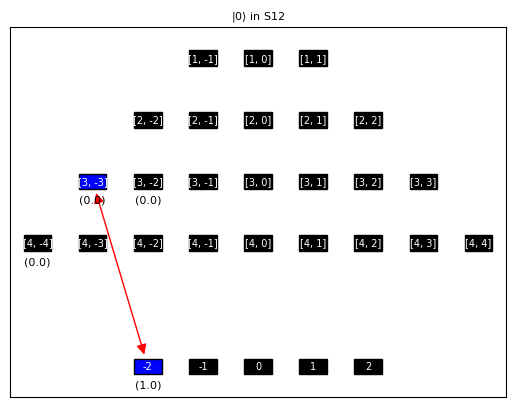

In [92]:
# initial_state = [[-2, 3, -3]]
# pulse_train_U1 = [[-2, 3, -3], [-2, 3, -3], [-2, 2, -2], [-2, 2, -1], [-2, 3, -2], [-2, 4, -4]]
# fractions_U1 = [1, 0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.5]
# simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0]
# fixed_phase_mask_U1 = [1, 0, 0, 0, 0, 0]
# probe_trans = [[-2, 3, -3], [0, 2, -2], [1, 2, -1], [-2, 3, -2], [-2, 4, -4]]
# pulse_train_U2 =  [[-2, 4, -4], [-2, 3, -2], [-2, 2, -1], [-2, 2, -2], [-2, 3, -3]]
# fractions_U2 = [0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666]
# simulated_phase_mask_U2 = [5, 4, 3, 2, 1]
# fixed_phase_mask_U2 = [1, 1, 1, 1, 1]

initial_state = [[-2, 3, -3]]
pulse_train_U1 = [[-2, 3, -3], [-2, 3, -2], [-2, 4, -4]]
fractions_U1 = [0.25, 0.3333333333333333, 0.5]
simulated_phase_mask_U1 = [0, 0, 0]
fixed_phase_mask_U1 = [0, 0, 0]
probe_trans = [[-2, 3, -3], [-2, 3, -2], [-2, 4, -4]]
pulse_train_U2 =  [[-2, 4, -4], [-2, 3, -2], [-2, 3, -3]]
fractions_U2 = [0.5, 0.3333333333333333, 0.25]
simulated_phase_mask_U2 = [3, 2, 1]
fixed_phase_mask_U2 = [1, 1, 1]

# initial_state = [[-2, 4, -4]]

# pulse_train_U1 = [[-2, 4, -4], [-2, 3, -3], [-2, 4, -4], [-2, 3, -2], [-2, 4, -4], [-2, 3, -1]]
# fractions_U1 = [0.25, 1, 0.33333333333333337, 1, 0.5, 1]
# simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0]
# fixed_phase_mask_U1 = [1, 0, 1, 0, 1, 0]

# pulse_train_U2 = [[-2, 3, -1], [-2, 4, -4], [-2, 3, -1], [-2, 3, -2], [-2, 4, -4], [-2, 3, -2], [-2, 3, -3], [-2, 4, -4], [-2, 3, -3]]
# fractions_U2 = [1, 0.5, 1, 1, 0.33333333333333337, 1, 1, 0.25, 1]
# simulated_phase_mask_U2 = [0, 3, 0, 0, 2, 0, 0, 1, 0]
# fixed_phase_mask_U2 = [1, 0, 0, 1, 0, 0, 1, 0, 0]

pulse_list = []
for i in initial_state+pulse_train_U1+pulse_train_U2:
    pulse_list.append([i[0],i[1:]])

pulse_fractions = [1] + fractions_U1 + fractions_U2
pulse_phases = [0] + fixed_phase_mask_U1 + fixed_phase_mask_U2

print(len(pulse_list),len(pulse_fractions),pulse_phases)

from PIL import Image
import io
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from IPython import display
import time
import numpy as np

def animate_paths_with_population_transfer_bidirectional(list_of_paths, transfer_fractions, transfer_phase, initial_population, 
                                                          delay=0.5, save_path='animation.gif'):

    # Store frames for GIF
    frames = []
    
    G = nx.DiGraph()
    print(list_of_paths, transfer_fractions, transfer_phase)
    # Setup node positions
    Fs=[0, 1, 2, 3, 4]
    row_labels = []
    for i in Fs:
        for j in range(2 * i + 1):
            mF = i - j
            row_labels.append([i, mF])
    
    pos = {
        '-2': (-2, -2),
        '-1': (-1, -2),
        '0': (0, -2),
        '1': (1, -2),
        '2': (2, -2),
    }
    for i in row_labels:
        pos[f"{i}"] = (i[1], abs(i[0] - 4))

    # Add all nodes with positions
    for node in pos.keys():
        G.add_node(node, pos=pos[node])
    
    # Convert paths to strings
    string_paths = [[str(node) if not isinstance(node, list) else str(node) for node in path] 
                    for path in list_of_paths]
    print('string_paths = ',string_paths)
    # Initialize population tracking
    node_populations = {}  # Track current population of each node
    population_history = {}  # Track population changes over time
    node_amplitudes = {}  # Complex amplitudes
    # Set initial population
    start_node = string_paths[0][1]  # Assume all paths start from same node
    node_amplitudes[start_node] = np.sqrt(initial_population)

    # Create list of all population transfer events
    transfer_events = []
    print(transfer_fractions, transfer_phase)
    for path, fraction, phase in zip(string_paths, transfer_fractions, transfer_phase):
        from_node = path[0]
        to_node = path[1]
        if to_node not in node_amplitudes:
            node_amplitudes[to_node] = 0
        print(path, fraction, phase)
        theta = np.arcsin(np.sqrt(fraction)) 
        phi = phase

        # Givens rotation matrix
        rotation_matrix = np.array([
            [np.cos(theta), -np.sin(theta) * np.exp(-1j * np.pi*phi)],
            [np.sin(theta) * np.exp(1j * np.pi*phi), np.cos(theta)]
        ])

        # Apply rotation
        from_amp = node_amplitudes.get(from_node, 0.0)
        to_amp = node_amplitudes.get(to_node, 0.0)

        updated_amplitudes = rotation_matrix @ np.array([from_amp, to_amp])
        node_amplitudes[from_node] = updated_amplitudes[0]
        node_amplitudes[to_node] = updated_amplitudes[1]

        # Store the event
        transfer_events.append({
            'edge': (from_node, to_node),
            'from_amp': node_amplitudes[from_node],
            'to_amp': node_amplitudes[to_node],
            'theta': theta,
            'phi': phi,
        })

        # Store in history
        
        for node, amp in node_amplitudes.items():
            if node not in population_history:
                population_history[node] = {}
            step = len(transfer_events) - 1
            population_history[node][step] = np.round(abs(amp)**2,2)  # Store population (amplitude squared)

     
    def capture_frame():
        # Save current figure to a buffer
        buf = io.BytesIO()
        plt.savefig(buf, format='png', bbox_inches='tight', dpi=300)
        buf.seek(0)
        return Image.open(buf)

    def draw_frame(step, current_edge=None, node_colors=None):
        plt.figure()  
        plt.clf()
        ax = plt.gca()
        
        # Set default node colors if not provided
        if node_colors is None:
            node_colors = {node: 'black' for node in pos.keys()}
        
        # Draw nodes with the specified colors
        xh = 0.5
        yh = 0.25
        for node, (x, y) in pos.items():
            # Use the specified color for each node
            color = node_colors.get(node, 'black')
            ax.add_patch(Rectangle((x - xh / 2, y - yh / 2), xh, yh, 
                                   fill=True, color=color, ec='black', lw=1))
            
            # Add population text below node if it has a population
            if node in population_history and step in population_history[node]:
                plt.text(x, y - yh/2 - 0.1, f'({population_history[node][step]})', 
                         ha='center', va='top', color='black',fontsize = 8)
        
        # Draw single current edge if exists
        if current_edge:
            temp_graph = nx.DiGraph()
            temp_graph.add_nodes_from(G.nodes(data=True))
            temp_graph.add_edge(*current_edge)
            nx.draw_networkx_edges(
                temp_graph, pos, alpha=1, edge_color='red', 
                arrowstyle='<|-|>', arrowsize=15
            )
        
        # Draw node labels
        nx.draw_networkx_labels(G, pos, font_size=7, font_color='white')
        
        plt.xlim(-4.5, 4.5)
        plt.ylim(-2.5, 3.5)
        plt.title(r'$|0\rangle$ in S12',fontsize = 8)
        
        # Capture frame for GIF
        frames.append(capture_frame())

    # Initial frame (no edges)
    draw_frame(0)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(delay)
    print(len(transfer_events))
    # Animate edges and population changes one at a time
    for i, event in enumerate(transfer_events):
        # Highlight nodes involved in the current transfer
        from_node, to_node = event['edge']
        node_colors = {node: 'black' for node in pos.keys()}  # Default all nodes to black
        node_colors[from_node] = 'blue'  # Highlight source node
        node_colors[to_node] = 'blue'  # Highlight destination node
        
        # Draw frame with highlighted nodes
        draw_frame(i, current_edge=event['edge'], node_colors=node_colors)
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(delay)
        
        # Show frame without edge but with updated populations
        if i < len(transfer_events) - 1:  # Don't need extra frame after last transfer
            draw_frame(i)
            display.clear_output(wait=True)
            display.display(plt.gcf())
            time.sleep(delay)
    
    # Save the animation as GIF
    frames[0].save(
        save_path,
        save_all=True,
        append_images=frames[1:],
        duration=int(delay * 1000),  # PIL uses milliseconds
        loop=0
    )
    
    # plt.show()


animate_paths_with_population_transfer_bidirectional(
    pulse_list, 
    pulse_fractions,
    pulse_phases,
    1,
    save_path='population_transfer_d=4_ket0_inS12.gif'
)